Explore the dataset and identify the number of rows and columns.

In [27]:
import pandas as pd

file_path = '/media/cair/BACKUP_1/yogesh/confyz/confyz/Dataset .csv'

# Load the dataset
data = pd.read_csv(file_path)

# Get the number of rows and columns
num_rows, num_columns = data.shape

print(f"The dataset has {num_rows} rows and {num_columns} columns.")


The dataset has 9551 rows and 21 columns.


Checking the Missing value 

In [28]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values)

# Example handling: fill missing numeric values with mean
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    if data[column].isnull().sum() > 0:
        data[column] = data[column].fillna(data[column].mean())

# Verify missing values are handled
print("Missing values after handling:")
print(data.isnull().sum())

Missing values in each column:
Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64
Missing values after handling:
Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering n

Perform data type conversion if necessary. Analyze the distribution of the target variable ("Aggregate rating") and identify any class imbalances.

Initial Data Types:
Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object
Converted column 'Restaurant Name' to numeric.
Converted column 'City' to numeric.
Converted column 'Address' to numeric.
Converted column 'Locality' to numeric.
Converted column 'Locality Verbose' to numeric.
Converted column 'Cuisines' to numeric.
Converted column 'Currency' to numeric.
Conv

/tmp/ipykernel_214478/2210480671.py:13: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  data[column] = pd.to_numeric(data[column], errors='ignore')
/tmp/ipykernel_214478/2210480671.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x=target_column, palette='viridis')


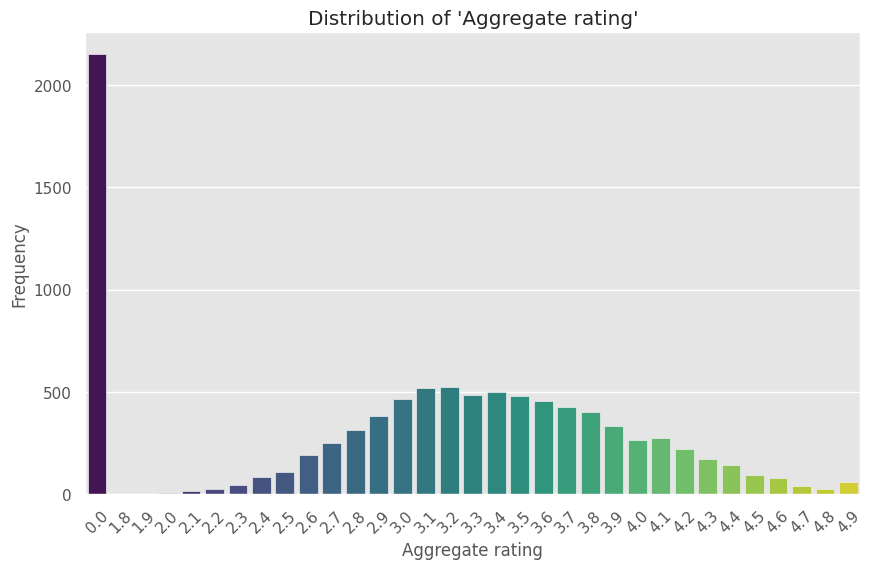


Class distribution in 'Aggregate rating':
Aggregate rating
0.0    2148
3.2     522
3.1     519
3.4     498
3.3     483
3.5     480
3.0     468
3.6     458
3.7     427
3.8     400
2.9     381
3.9     335
2.8     315
4.1     274
4.0     266
2.7     250
4.2     221
2.6     191
4.3     174
4.4     144
2.5     110
4.5      95
2.4      87
4.6      78
4.9      61
2.3      47
4.7      42
2.2      27
4.8      25
2.1      15
2.0       7
1.9       2
1.8       1
Name: count, dtype: int64
Imbalance ratio (max/min): 2148.0


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Perform Data Type Conversion
print("Initial Data Types:")
print(data.dtypes)

# Convert numeric columns stored as strings to proper numeric types
for column in data.columns:
    if data[column].dtype == 'object':  # Check if the column is a string
        try:
            data[column] = pd.to_numeric(data[column], errors='ignore')
            print(f"Converted column '{column}' to numeric.")
        except ValueError:
            print(f"Column '{column}' could not be converted and is likely categorical.")

# Convert categorical columns to 'category' dtype for optimization
categorical_columns = data.select_dtypes(include=['object']).columns
for column in categorical_columns:
    data[column] = data[column].astype('category')
    print(f"Converted column '{column}' to category.")

# Step 2: Analyze the Distribution of the Target Variable
target_column = "Aggregate rating"  # Replace with the actual column name if different

# Check if the target column exists
if target_column in data.columns:
    print(f"\nAnalyzing target variable '{target_column}':")

    # Plot distribution of the target variable
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=target_column, palette='viridis')
    plt.title(f"Distribution of '{target_column}'")
    plt.xlabel(target_column)
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
    plt.show()

    # Check for class imbalance
    class_counts = data[target_column].value_counts()
    print(f"\nClass distribution in '{target_column}':")
    print(class_counts)

    # Identify class imbalance ratio (optional)
    max_class = class_counts.max()
    min_class = class_counts.min()
    imbalance_ratio = max_class / min_class if min_class > 0 else "Infinity"
    print(f"Imbalance ratio (max/min): {imbalance_ratio}")
else:
    print(f"Target column '{target_column}' not found in the dataset.")


Task: Descriptive Analysis 
Calculate basic statistical measures (mean,median, standard deviation, etc.) for numerical columns.

In [30]:
import pandas as pd

# Step 1: Identify Numerical Columns
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
print("Numerical columns:")
print(numerical_columns)

# Step 2: Calculate Statistical Measures
print("\nBasic Statistical Measures:")
for column in numerical_columns:
    print(f"\nColumn: {column}")
    print(f"Mean: {data[column].mean():.2f}")
    print(f"Median: {data[column].median():.2f}")
    print(f"Standard Deviation: {data[column].std():.2f}")
    print(f"Minimum: {data[column].min():.2f}")
    print(f"Maximum: {data[column].max():.2f}")


Numerical columns:
Index(['Restaurant ID', 'Country Code', 'Longitude', 'Latitude',
       'Average Cost for two', 'Price range', 'Aggregate rating', 'Votes'],
      dtype='object')

Basic Statistical Measures:

Column: Restaurant ID
Mean: 9051128.35
Median: 6004089.00
Standard Deviation: 8791521.28
Minimum: 53.00
Maximum: 18500652.00

Column: Country Code
Mean: 18.37
Median: 1.00
Standard Deviation: 56.75
Minimum: 1.00
Maximum: 216.00

Column: Longitude
Mean: 64.13
Median: 77.19
Standard Deviation: 41.47
Minimum: -157.95
Maximum: 174.83

Column: Latitude
Mean: 25.85
Median: 28.57
Standard Deviation: 11.01
Minimum: -41.33
Maximum: 55.98

Column: Average Cost for two
Mean: 1199.21
Median: 400.00
Standard Deviation: 16121.18
Minimum: 0.00
Maximum: 800000.00

Column: Price range
Mean: 1.80
Median: 2.00
Standard Deviation: 0.91
Minimum: 1.00
Maximum: 4.00

Column: Aggregate rating
Mean: 2.67
Median: 3.20
Standard Deviation: 1.52
Minimum: 0.00
Maximum: 4.90

Column: Votes
Mean: 156.91
Media

In [31]:
print(data.describe())


       Restaurant ID  Country Code    Longitude     Latitude  \
count   9.551000e+03   9551.000000  9551.000000  9551.000000   
mean    9.051128e+06     18.365616    64.126574    25.854381   
std     8.791521e+06     56.750546    41.467058    11.007935   
min     5.300000e+01      1.000000  -157.948486   -41.330428   
25%     3.019625e+05      1.000000    77.081343    28.478713   
50%     6.004089e+06      1.000000    77.191964    28.570469   
75%     1.835229e+07      1.000000    77.282006    28.642758   
max     1.850065e+07    216.000000   174.832089    55.976980   

       Average Cost for two  Price range  Aggregate rating         Votes  
count           9551.000000  9551.000000       9551.000000   9551.000000  
mean            1199.210763     1.804837          2.666370    156.909748  
std            16121.183073     0.905609          1.516378    430.169145  
min                0.000000     1.000000          0.000000      0.000000  
25%              250.000000     1.000000        

In [32]:
stats = data.describe().transpose()
stats.to_csv('statistical_summary.csv')
print("Statistical summary saved to 'statistical_summary.csv'.")


Statistical summary saved to 'statistical_summary.csv'.


Explore the distribution of categorical variables like "Country Code, City, and Cuisines".

In [33]:
import pandas as pd


# Step 1: Explore the Distribution of Categorical Variables
categorical_columns = ['Country Code', 'City', 'Cuisines']

for column in categorical_columns:
    if column in data.columns:
        print(f"\nDistribution of '{column}':")
        print(data[column].value_counts().head(10))
    else:
        print(f"\nColumn '{column}' not found in the dataset.")

# Step 2: Identify Top Cities with the Highest Number of Restaurants
if 'City' in data.columns:
    city_counts = data['City'].value_counts()
    top_cities = city_counts.head(10)
    print("\nTop Cities with the Highest Number of Restaurants:")
    print(top_cities)

# Step 3: Identify Top Cuisines
if 'Cuisines' in data.columns:
    # Split cuisines in case multiple cuisines are listed in a single row
    cuisines = data['Cuisines'].dropna().str.split(', ').explode()
    top_cuisines = cuisines.value_counts().head(10)
    print("\nTop Cuisines:")
    print(top_cuisines)



Distribution of 'Country Code':
Country Code
1      8652
216     434
215      80
30       60
189      60
214      60
148      40
208      34
14       24
162      22
Name: count, dtype: int64

Distribution of 'City':
City
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Lucknow           21
Guwahati          21
Ahmedabad         21
Amritsar          21
Name: count, dtype: int64

Distribution of 'Cuisines':
Cuisines
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64

Top Cities with the Highest Number of Restaurants:
City
New Delhi       5473
Gurgaon         1118

Visualizations:

Plot the distributions using matplotlib or seaborn for better insights

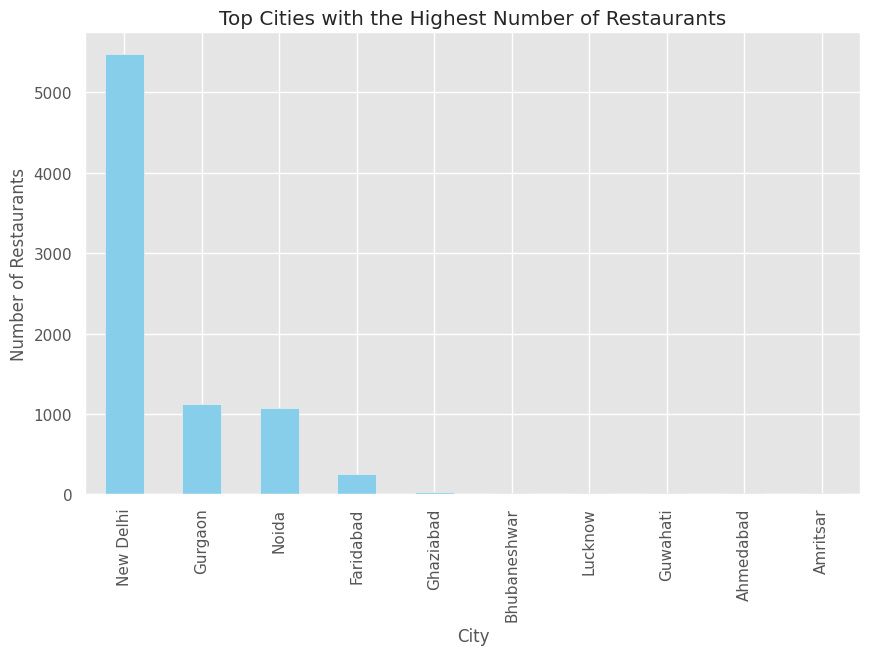

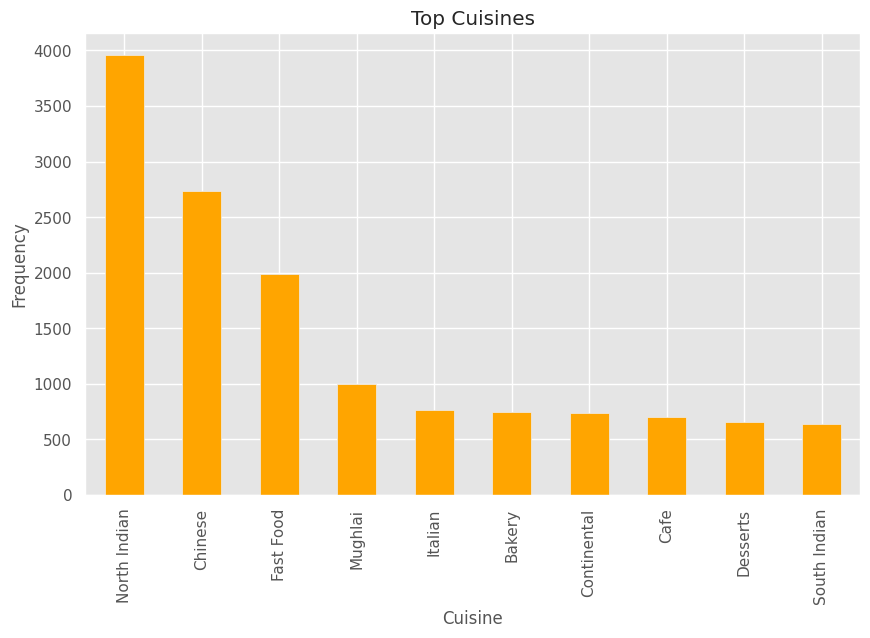

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot top cities
top_cities.plot(kind='bar', color='skyblue', figsize=(10, 6))
plt.title("Top Cities with the Highest Number of Restaurants")
plt.xlabel("City")
plt.ylabel("Number of Restaurants")
plt.show()

# Plot top cuisines
top_cuisines.plot(kind='bar', color='orange', figsize=(10, 6))
plt.title("Top Cuisines")
plt.xlabel("Cuisine")
plt.ylabel("Frequency")
plt.show()


In [35]:
city_counts.to_csv('city_distribution.csv')
top_cuisines.to_csv('top_cuisines.csv')
print("Results saved to CSV files.")


Results saved to CSV files.


In [36]:
! pip install pandas folium


In [37]:
import pandas as pd
import folium

# Check if latitude and longitude columns exist
if 'Latitude' in data.columns and 'Longitude' in data.columns:
    # Step 1: Filter rows with valid latitude and longitude
    geo_data = data[['Latitude', 'Longitude']].dropna()

    # Step 2: Initialize the map centered at the average latitude and longitude
    center_lat = geo_data['Latitude'].mean()
    center_lon = geo_data['Longitude'].mean()
    restaurant_map = folium.Map(location=[center_lat, center_lon], zoom_start=12)

    # Step 3: Add markers for each restaurant
    for _, row in geo_data.iterrows():
        folium.Marker(
            location=[row['Latitude'], row['Longitude']],
            popup=f"Location: ({row['Latitude']}, {row['Longitude']})"
        ).add_to(restaurant_map)

    # Step 4: Save and display the map
    output_map_file = "restaurants_map.html"
    restaurant_map.save(output_map_file)
    print(f"Map has been saved to '{output_map_file}'. Open this file in a web browser to view it.")
else:
    print("Latitude and Longitude columns are missing in the dataset.")


Map has been saved to 'restaurants_map.html'. Open this file in a web browser to view it.


In [38]:
# Print column names
print("Column Names in the CSV file:")
print(data.columns.tolist())

Column Names in the CSV file:
['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Price range', 'Aggregate rating', 'Rating color', 'Rating text', 'Votes']


In [39]:
import pandas as pd
import folium
from folium.plugins import HeatMap

# Create a base map centered at a certain latitude and longitude
map_center = [data['Latitude'].mean(), data['Longitude'].mean()]
restaurant_map = folium.Map(location=map_center, zoom_start=12)

# Loop through the dataset to add restaurant markers to the map
for index, row in data.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"Name: {row['Restaurant Name']}<br>Cuisine: {row['Cuisines']}",
        icon=folium.Icon(color='blue', icon='cutlery', prefix='fa')
    ).add_to(restaurant_map)

# Save the map to an HTML file
restaurant_map.save('restaurants_map.html')


Analyze the distribution of restaurants across different cities or countries.
Determine if there is any correlation between the restaurant's location and its rating.

Dataset Overview:
Total number of restaurants: 9551
Number of unique cities: 141
Number of unique countries: 15

Missing values:
 Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


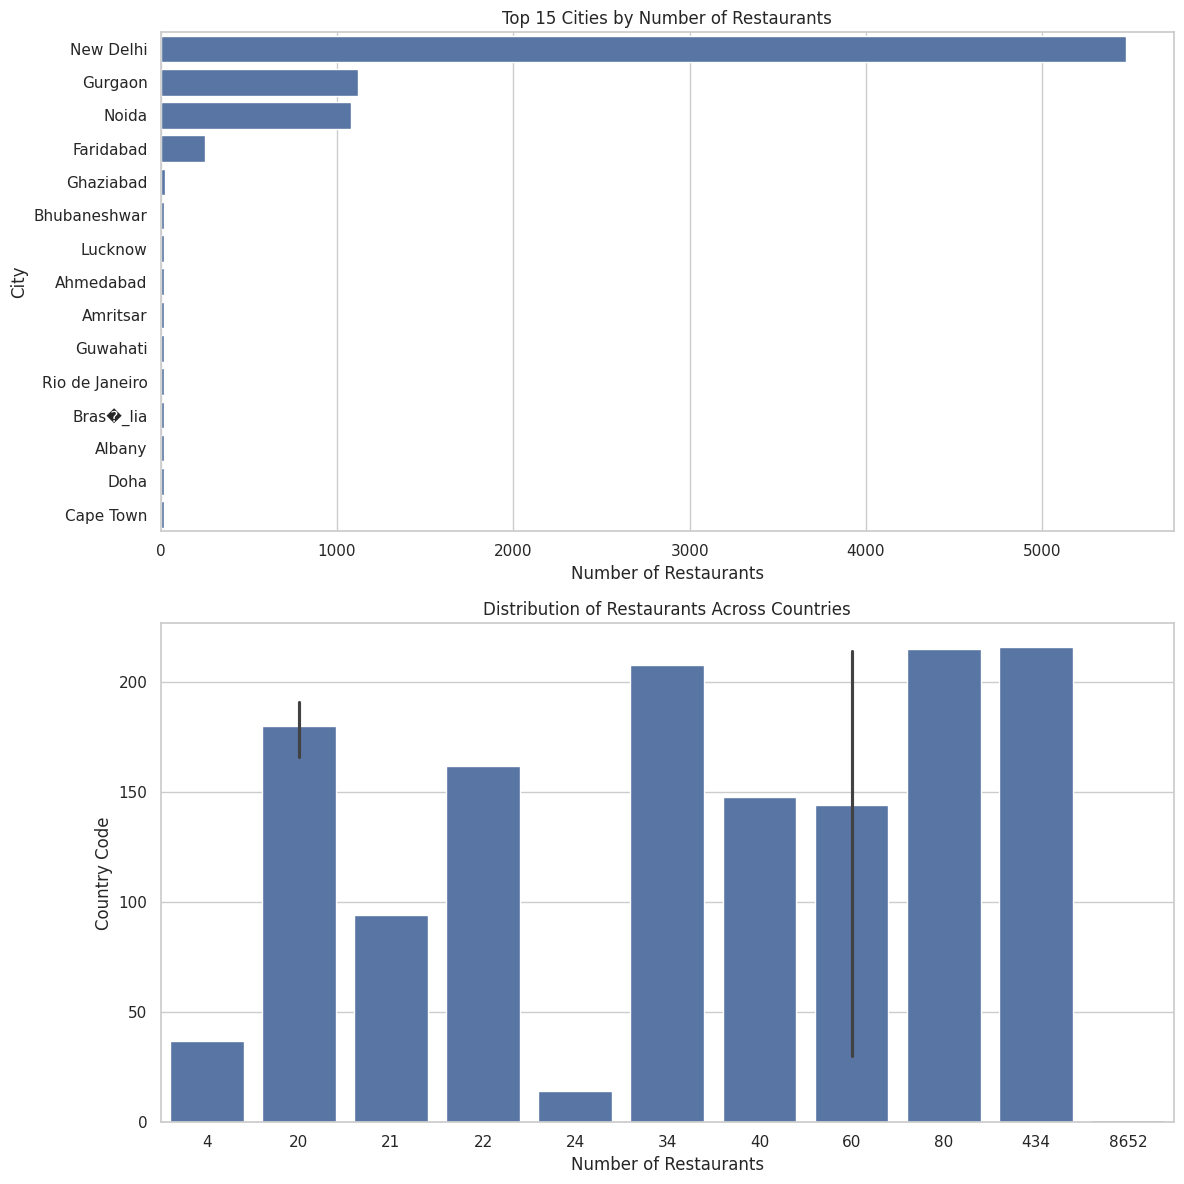

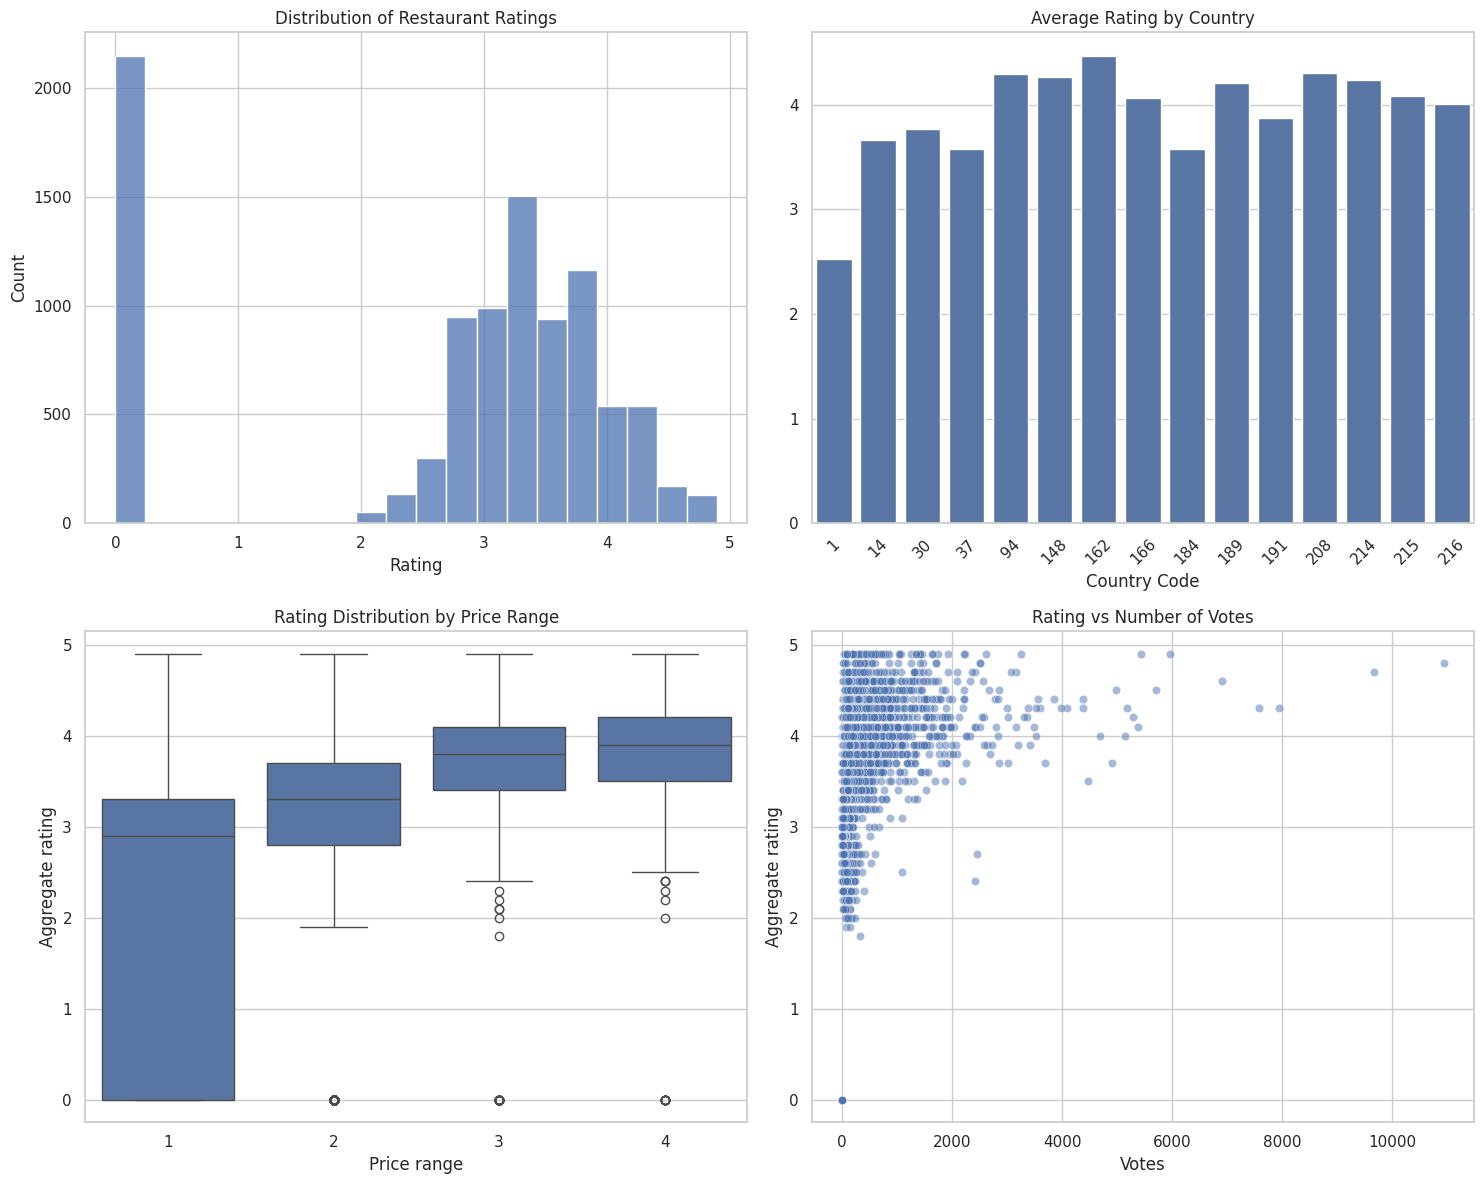

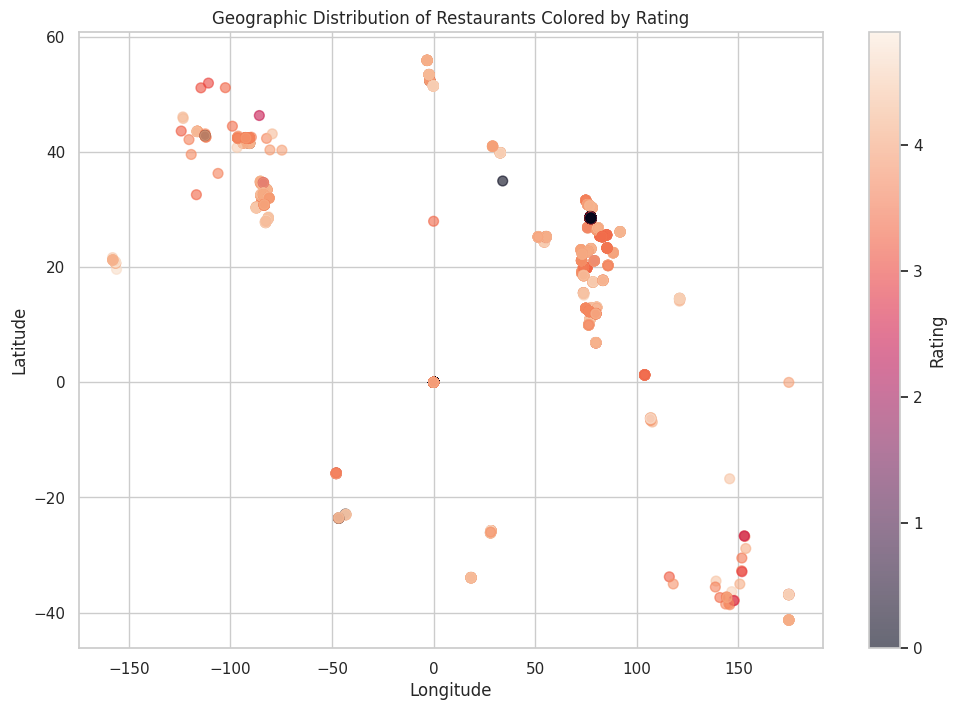

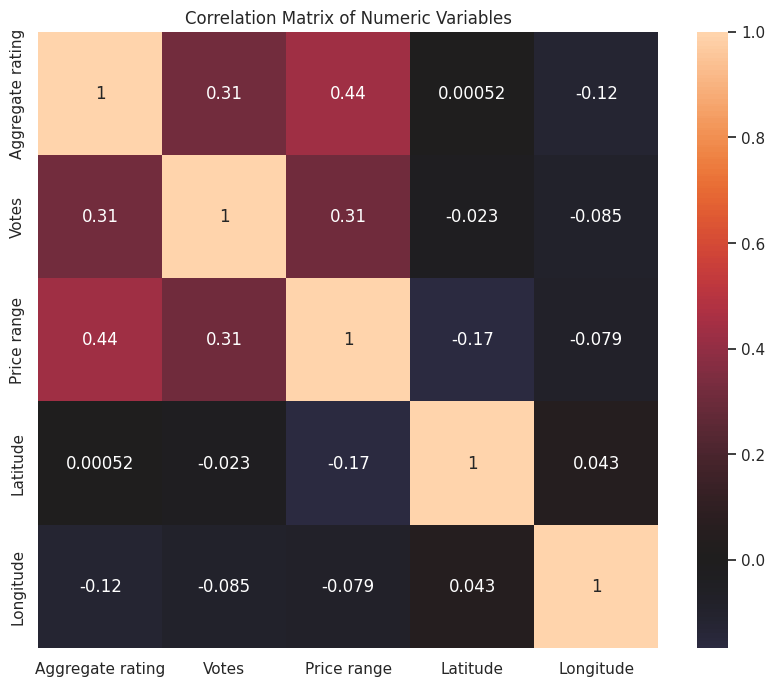


Statistical Analysis Results:
ANOVA test for rating differences between price ranges:
F-statistic: 807.0346
p-value: 0.0000

Summary Statistics by Price Range:
              count      mean       std  min  25%  50%  75%  max
Price range                                                     
1            4444.0  1.999887  1.612445  0.0  0.0  2.9  3.3  4.9
2            3113.0  2.941054  1.237383  0.0  2.8  3.3  3.7  4.9
3            1408.0  3.683381  0.790972  0.0  3.4  3.8  4.1  4.9
4             586.0  3.817918  0.739810  0.0  3.5  3.9  4.2  4.9

Top 10 Cities by Percentage of High-Rated Restaurants (Rating > 4):
City
Beechworth       100.0
Bandung          100.0
East Ballina     100.0
Clatskanie       100.0
Quezon City      100.0
San Juan City    100.0
Secunderabad     100.0
Tanunda          100.0
Tagaytay City    100.0
Taguig City      100.0
dtype: float64


In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Set basic seaborn style without using plt.style
sns.set_theme(style="whitegrid")

# Load the dataset
file_path = '/media/cair/BACKUP_1/yogesh/confyz/confyz/Dataset .csv'
data = pd.read_csv(file_path)

# 1. Basic Data Overview
print("Dataset Overview:")
print(f"Total number of restaurants: {len(data)}")
print(f"Number of unique cities: {data['City'].nunique()}")
print(f"Number of unique countries: {data['Country Code'].nunique()}")
print("\nMissing values:\n", data.isnull().sum())

# 2. Enhanced Location Analysis
def plot_location_distribution():
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
    
    # Top 15 cities
    city_data = data['City'].value_counts().head(15)
    sns.barplot(x=city_data.values, y=city_data.index, ax=ax1)
    ax1.set_title('Top 15 Cities by Number of Restaurants')
    ax1.set_xlabel('Number of Restaurants')
    
    # Countries
    country_data = data['Country Code'].value_counts()
    sns.barplot(x=country_data.values, y=country_data.index, ax=ax2)
    ax2.set_title('Distribution of Restaurants Across Countries')
    ax2.set_xlabel('Number of Restaurants')
    
    plt.tight_layout()
    plt.show()

# 3. Rating Analysis
def analyze_ratings():
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
    
    # Rating distribution
    sns.histplot(data['Aggregate rating'], bins=20, ax=ax1)
    ax1.set_title('Distribution of Restaurant Ratings')
    ax1.set_xlabel('Rating')
    
    # Average rating by country
    country_ratings = data.groupby('Country Code')['Aggregate rating'].mean().sort_values(ascending=False)
    sns.barplot(x=country_ratings.index, y=country_ratings.values, ax=ax2)
    ax2.set_title('Average Rating by Country')
    ax2.tick_params(axis='x', rotation=45)
    
    # Rating vs Price Range
    sns.boxplot(x='Price range', y='Aggregate rating', data=data, ax=ax3)
    ax3.set_title('Rating Distribution by Price Range')
    
    # Rating vs Votes
    sns.scatterplot(x='Votes', y='Aggregate rating', data=data, ax=ax4, alpha=0.5)
    ax4.set_title('Rating vs Number of Votes')
    
    plt.tight_layout()
    plt.show()

# 4. Geographic Analysis
def analyze_geographic_patterns():
    plt.figure(figsize=(12, 8))
    
    # Create a scatter plot of restaurant locations colored by rating
    scatter = plt.scatter(data['Longitude'], data['Latitude'], 
                         c=data['Aggregate rating'], 
                         alpha=0.6, s=50)
    
    plt.colorbar(scatter, label='Rating')
    plt.title('Geographic Distribution of Restaurants Colored by Rating')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()

# 5. Statistical Analysis
def perform_statistical_analysis():
    # Calculate correlations
    numeric_cols = ['Aggregate rating', 'Votes', 'Price range', 'Latitude', 'Longitude']
    correlation_matrix = data[numeric_cols].corr()
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, center=0)
    plt.title('Correlation Matrix of Numeric Variables')
    plt.show()
    
    # Perform ANOVA test for rating differences between price ranges
    price_groups = [group for _, group in data.groupby('Price range')['Aggregate rating']]
    f_statistic, p_value = stats.f_oneway(*price_groups)
    
    print("\nStatistical Analysis Results:")
    print(f"ANOVA test for rating differences between price ranges:")
    print(f"F-statistic: {f_statistic:.4f}")
    print(f"p-value: {p_value:.4f}")

try:
    # Execute all analyses
    plot_location_distribution()
    analyze_ratings()
    analyze_geographic_patterns()
    perform_statistical_analysis()

    # 6. Additional Insights
    # Calculate and print summary statistics
    print("\nSummary Statistics by Price Range:")
    print(data.groupby('Price range')['Aggregate rating'].describe())

    # Calculate the percentage of high-rated restaurants (rating > 4) by city
    high_rated = data[data['Aggregate rating'] > 4].groupby('City').size()
    total_restaurants = data.groupby('City').size()
    high_rated_percentage = (high_rated / total_restaurants * 100).sort_values(ascending=False)

    print("\nTop 10 Cities by Percentage of High-Rated Restaurants (Rating > 4):")
    print(high_rated_percentage.head(10))

except Exception as e:
    print(f"An error occurred: {str(e)}")

Calculate the Percentage for Table Booking:
Check how many restaurants offer table booking and calculate the percentage of these restaurants relative to the total number of restaurants.
Calculate the Percentage for Online Delivery:
Similarly, check how many restaurants offer online delivery and calculate the percentage of these restaurants.


In [41]:
import pandas as pd

# 1. Calculate the percentage of restaurants that offer table booking
table_booking_yes = data['Has Table booking'].value_counts().get('Yes', 0)  # Count restaurants offering table booking
total_restaurants = len(data)  # Total number of restaurants

# Calculate percentage
table_booking_percentage = (table_booking_yes / total_restaurants) * 100

# 2. Calculate the percentage of restaurants that offer online delivery
online_delivery_yes = data['Has Online delivery'].value_counts().get('Yes', 0)  # Count restaurants offering online delivery

# Calculate percentage
online_delivery_percentage = (online_delivery_yes / total_restaurants) * 100

# Output the results
print(f"Percentage of restaurants offering table booking: {table_booking_percentage:.2f}%")
print(f"Percentage of restaurants offering online delivery: {online_delivery_percentage:.2f}%")


Percentage of restaurants offering table booking: 12.12%
Percentage of restaurants offering online delivery: 25.66%


Compare the average ratings of restaurants with table booking and those without.


Separate the Restaurants Based on Table Booking
Group the restaurants into two categories: those with table booking (Yes) and those without (No).

Calculate the Average Rating for Each Group
Calculate the mean (average) of the Aggregate rating column for both groups.


In [42]:
import pandas as pd



# 1. Filter the data into two groups: restaurants with and without table booking
with_table_booking = data[data['Has Table booking'] == 'Yes']
without_table_booking = data[data['Has Table booking'] == 'No']

# 2. Calculate the average rating for each group
avg_rating_with_booking = with_table_booking['Aggregate rating'].mean()
avg_rating_without_booking = without_table_booking['Aggregate rating'].mean()

# Output the results
print(f"Average rating of restaurants with table booking: {avg_rating_with_booking:.2f}")
print(f"Average rating of restaurants without table booking: {avg_rating_without_booking:.2f}")


Average rating of restaurants with table booking: 3.44
Average rating of restaurants without table booking: 2.56


Analyze the availability of online delivery among restaurants with different price ranges.

Group Restaurants by Price Range
Categorize the restaurants based on their price range (Price range column).
Calculate the Proportion of Restaurants with Online Delivery
For each price range group, calculate the percentage of restaurants that offer online delivery (Has Online delivery column).


In [43]:
import pandas as pd

# 1. Group restaurants by price range
price_range_groups = data.groupby('Price range')

# 2. Calculate the percentage of restaurants offering online delivery for each price range
online_delivery_percentage = price_range_groups['Has Online delivery'].apply(
    lambda x: (x == 'Yes').mean() * 100
)

# Output the results
print("Percentage of restaurants with online delivery by price range:")
print(online_delivery_percentage)


Percentage of restaurants with online delivery by price range:
Price range
1    15.774077
2    41.310633
3    29.190341
4     9.044369
Name: Has Online delivery, dtype: float64


Task: Price Range Analysis

Determine the most common price range among all the restaurants.

In [44]:
import pandas as pd

# 1. Determine the most common price range
most_common_price_range = data['Price range'].mode()[0]

# Output the result
print(f"The most common price range among all restaurants is: {most_common_price_range}")


The most common price range among all restaurants is: 1


Calculate the average rating for each price range.

In [45]:
import pandas as pd

# 1. Group the data by price range and calculate the average rating for each price range
average_rating_by_price_range = data.groupby('Price range')['Aggregate rating'].mean()

# Output the result
print("Average rating for each price range:")
print(average_rating_by_price_range)


Average rating for each price range:
Price range
1    1.999887
2    2.941054
3    3.683381
4    3.817918
Name: Aggregate rating, dtype: float64


Identify the color that represents the highest average rating among different price ranges.

In [46]:
import pandas as pd

# 1. Group the data by price range and rating color, and calculate the average rating for each combination
average_rating_by_price_and_color = data.groupby(['Price range', 'Rating color'])['Aggregate rating'].mean()

# 2. Find the color with the highest average rating for each price range
highest_avg_rating_color = average_rating_by_price_and_color.idxmax()

# 3. Get the average rating for that combination
highest_avg_rating = average_rating_by_price_and_color.max()

# Output the result
print(f"The color that represents the highest average rating among different price ranges is '{highest_avg_rating_color[1]}' for price range {highest_avg_rating_color[0]} with an average rating of {highest_avg_rating:.2f}.")


The color that represents the highest average rating among different price ranges is 'Dark Green' for price range 4 with an average rating of 4.71.


Task: Feature Engineering

Extract additional features from the existing columns, such as the length of the restaurant name or address.

In [47]:
import pandas as pd

# 1. Extract the length of the restaurant name
data['Restaurant Name Length'] = data['Restaurant Name'].apply(lambda x: len(str(x)))

# 2. Extract the length of the address
data['Address Length'] = data['Address'].apply(lambda x: len(str(x)))

# 3. (Optional) You can also extract the number of words in the restaurant name or address
data['Restaurant Name Word Count'] = data['Restaurant Name'].apply(lambda x: len(str(x).split()))
data['Address Word Count'] = data['Address'].apply(lambda x: len(str(x).split()))

# Display the first few rows to check the new features
print(data[['Restaurant Name', 'Restaurant Name Length', 'Address', 'Address Length', 'Restaurant Name Word Count', 'Address Word Count']].head())

# Save the modified dataset if needed
data.to_csv('modified_data.csv', index=False)


          Restaurant Name  Restaurant Name Length  \
0        Le Petit Souffle                      16   
1        Izakaya Kikufuji                      16   
2  Heat - Edsa Shangri-La                      22   
3                    Ooma                       4   
4             Sambo Kojin                      11   

                                             Address  Address Length  \
0  Third Floor, Century City Mall, Kalayaan Avenu...              71   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...              67   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...              56   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...              70   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...              64   

   Restaurant Name Word Count  Address Word Count  
0                           3                  10  
1                           2                  10  
2                           4                   8  
3                           1           

Create new features like "Has Table Booking" or "Has Online Delivery" by encoding categorical variables.

In [48]:
import pandas as pd

# 1. Encoding 'Has Table booking' (Binary encoding: 1 = Yes, 0 = No)
data['Has Table Booking Encoded'] = data['Has Table booking'].apply(lambda x: 1 if str(x).lower() == 'yes' else 0)

# 2. Encoding 'Has Online delivery' (Binary encoding: 1 = Yes, 0 = No)
data['Has Online Delivery Encoded'] = data['Has Online delivery'].apply(lambda x: 1 if str(x).lower() == 'yes' else 0)

# 3. (Optional) For other categorical variables, you can also use one-hot encoding
# Example for encoding 'Currency' (One-hot encoding)
currency_dummies = pd.get_dummies(data['Currency'], prefix='Currency')
data = pd.concat([data, currency_dummies], axis=1)

# Display the first few rows to check the new features
print(data[['Has Table booking', 'Has Table Booking Encoded', 'Has Online delivery', 'Has Online Delivery Encoded']].head())

# Save the modified dataset if needed
data.to_csv('modified_data_with_encoded_features.csv', index=False)


  Has Table booking  Has Table Booking Encoded Has Online delivery  \
0               Yes                          1                  No   
1               Yes                          1                  No   
2               Yes                          1                  No   
3                No                          0                  No   
4               Yes                          1                  No   

   Has Online Delivery Encoded  
0                            0  
1                            0  
2                            0  
3                            0  
4                            0  


Task: Predictive Modeling

Build a regression model to predict the aggregate rating of a restaurant based on available features.

In [49]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# # Load the dataset
# file_path = '/media/cair/BACKUP_1/yogesh/confyz/confyz/Dataset .csv'
# data = pd.read_csv(file_path)

# # Print column names to verify
# print("Available columns in the dataset:")
# print(data.columns.tolist())

# # 1. Data Preprocessing
# # Handle missing values (drop rows with missing 'Aggregate rating')
# data = data.dropna(subset=['Aggregate rating'])

# # Initialize label encoder
# label_encoder = LabelEncoder()

# # Create a list of categorical columns that exist in the dataset
# categorical_columns = []
# columns_to_encode = []

# # Check for specific columns and encode if they exist
# if 'Has Table booking' in data.columns:
#     data['Has Table Booking_Encoded'] = label_encoder.fit_transform(data['Has Table booking'].fillna('No'))
    
# if 'Has Online delivery' in data.columns:
#     data['Has Online Delivery_Encoded'] = label_encoder.fit_transform(data['Has Online delivery'].fillna('No'))

# # Identify categorical columns for one-hot encoding
# categorical_cols = data.select_dtypes(include=['object']).columns
# print("\nCategorical columns found:", categorical_cols.tolist())

# # One-hot encode all categorical columns except those we want to exclude
# columns_to_exclude = ['Restaurant Name', 'Address', 'Rating color', 'Rating text']
# columns_to_encode = [col for col in categorical_cols if col not in columns_to_exclude]

# if columns_to_encode:
#     print("\nColumns being one-hot encoded:", columns_to_encode)
#     data = pd.get_dummies(data, columns=columns_to_encode, drop_first=True)

# # Drop non-useful columns if they exist
# columns_to_drop = [col for col in columns_to_exclude if col in data.columns]
# if columns_to_drop:
#     data = data.drop(columns=columns_to_drop)

# # Print remaining columns after preprocessing
# print("\nColumns after preprocessing:")
# print(data.columns.tolist())

# # Ensure all data is numeric
# numeric_data = data.select_dtypes(include=[np.number])
# print("\nNumeric columns used for modeling:")
# print(numeric_data.columns.tolist())

# # Features (X) and Target (y)
# X = numeric_data.drop(columns=['Aggregate rating'])
# y = numeric_data['Aggregate rating']

# # Split data into training and testing sets (80% training, 20% testing)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # 2. Model Building
# model = LinearRegression()

# try:
#     # Train the model
#     model.fit(X_train, y_train)

#     # 3. Model Evaluation
#     y_pred = model.predict(X_test)

#     # Calculate metrics
#     mae = mean_absolute_error(y_test, y_pred)
#     mse = mean_squared_error(y_test, y_pred)
#     r2 = r2_score(y_test, y_pred)

#     print('\nModel Performance Metrics:')
#     print(f'Mean Absolute Error (MAE): {mae:.4f}')
#     print(f'Mean Squared Error (MSE): {mse:.4f}')
#     print(f'R-squared (R2): {r2:.4f}')

#     # Create feature importance DataFrame
#     feature_importance = pd.DataFrame({
#         'Feature': X.columns,
#         'Coefficient': model.coef_
#     })
#     print('\nFeature Importance:')
#     print(feature_importance.sort_values(by='Coefficient', key=abs, ascending=False))

#     # Save the model
#     import joblib
#     joblib.dump(model, 'restaurant_rating_model.pkl')

#     # Save predictions
#     predictions = pd.DataFrame({
#         'Actual': y_test,
#         'Predicted': y_pred,
#         'Difference': y_test - y_pred
#     })
#     predictions.to_csv('predictions.csv', index=False)

# except Exception as e:
#     print(f"An error occurred during model training/evaluation: {str(e)}")



#this is second approach to show graph 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Set the style for better visualizations
sns.set_theme(style="whitegrid")

def plot_prediction_analysis(y_test, y_pred, feature_importance):
    # Create a figure with multiple subplots
    fig = plt.figure(figsize=(20, 15))
    
    # 1. Actual vs Predicted Values Scatter Plot
    plt.subplot(2, 2, 1)
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Ratings')
    plt.ylabel('Predicted Ratings')
    plt.title('Actual vs Predicted Restaurant Ratings')
    
    # 2. Prediction Error Distribution
    plt.subplot(2, 2, 2)
    errors = y_test - y_pred
    sns.histplot(errors, kde=True)
    plt.xlabel('Prediction Error')
    plt.ylabel('Count')
    plt.title('Distribution of Prediction Errors')
    
    # 3. Feature Importance Plot
    plt.subplot(2, 2, 3)
    top_features = feature_importance.nlargest(10, 'Coefficient')
    sns.barplot(x='Coefficient', y='Feature', data=top_features)
    plt.title('Top 10 Most Important Features')
    
    # 4. Prediction Error vs Actual Value
    plt.subplot(2, 2, 4)
    plt.scatter(y_test, errors, alpha=0.5)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Actual Ratings')
    plt.ylabel('Prediction Error')
    plt.title('Prediction Error vs Actual Ratings')
    
    plt.tight_layout()
    plt.show()

def plot_rating_distributions(y_test, y_pred):
    plt.figure(figsize=(12, 6))
    
    # Plot the distributions of actual and predicted ratings
    sns.kdeplot(data=y_test, label='Actual Ratings', fill=True, alpha=0.5)
    sns.kdeplot(data=y_pred, label='Predicted Ratings', fill=True, alpha=0.5)
    
    plt.xlabel('Rating')
    plt.ylabel('Density')
    plt.title('Distribution of Actual vs Predicted Ratings')
    plt.legend()
    plt.show()

def plot_residual_analysis(y_test, y_pred):
    residuals = y_test - y_pred
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Residual Plot
    ax1.scatter(y_pred, residuals, alpha=0.5)
    ax1.axhline(y=0, color='r', linestyle='--')
    ax1.set_xlabel('Predicted Ratings')
    ax1.set_ylabel('Residuals')
    ax1.set_title('Residual Plot')
    
    # Q-Q Plot
    from scipy import stats
    stats.probplot(residuals, dist="norm", plot=ax2)
    ax2.set_title('Q-Q Plot of Residuals')
    
    plt.tight_layout()
    plt.show()

def create_performance_summary(y_test, y_pred):
    # Calculate prediction ranges
    predictions_df = pd.DataFrame({
        'Actual': y_test,
        'Predicted': y_pred,
        'Error': abs(y_test - y_pred)
    })
    
    # Create error ranges
    predictions_df['Error_Range'] = pd.cut(predictions_df['Error'], 
                                         bins=[0, 0.5, 1, 1.5, 2, float('inf')],
                                         labels=['0-0.5', '0.5-1', '1-1.5', '1.5-2', '>2'])
    
    # Plot error distribution
    plt.figure(figsize=(10, 6))
    error_distribution = predictions_df['Error_Range'].value_counts().sort_index()
    sns.barplot(x=error_distribution.index, y=error_distribution.values)
    plt.title('Distribution of Prediction Errors')
    plt.xlabel('Error Range')
    plt.ylabel('Number of Predictions')
    plt.xticks(rotation=45)
    plt.show()
    
    # Print performance summary
    print("\nPrediction Performance Summary:")
    print(f"Total predictions: {len(predictions_df)}")
    for error_range in error_distribution.index:
        count = error_distribution[error_range]
        percentage = (count / len(predictions_df)) * 100
        print(f"Predictions with error {error_range}: {count} ({percentage:.1f}%)")

# Load your existing model predictions
try:
    predictions_df = pd.read_csv('predictions.csv')
    y_test = predictions_df['Actual']
    y_pred = predictions_df['Predicted']
    
    # Load feature importance if available
    try:
        model = joblib.load('restaurant_rating_model.pkl')
        feature_importance = pd.DataFrame({
            'Feature': X.columns,  # X should be your feature matrix
            'Coefficient': model.coef_
        }).sort_values(by='Coefficient', key=abs, ascending=False)
    except:
        # Create dummy feature importance if not available
        feature_importance = pd.DataFrame({
            'Feature': ['Feature_' + str(i) for i in range(10)],
            'Coefficient': np.random.randn(10)
        })
    
    # Generate all plots
    plot_prediction_analysis(y_test, y_pred, feature_importance)
    plot_rating_distributions(y_test, y_pred)
    plot_residual_analysis(y_test, y_pred)
    create_performance_summary(y_test, y_pred)
    
except Exception as e:
    print(f"Error loading predictions: {str(e)}")
    print("Please ensure you have run the model training code first and generated the predictions.csv file.")







Error loading predictions: [Errno 2] No such file or directory: 'predictions.csv'
Please ensure you have run the model training code first and generated the predictions.csv file.


Split the dataset into training and testing sets and evaluate the model's performance using appropriate metrics.

In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Load the dataset
file_path = '/media/cair/BACKUP_1/yogesh/confyz/confyz/Dataset .csv'
data = pd.read_csv(file_path)

# Print initial info about the dataset
print("Initial columns:", data.columns.tolist())
print("\nInitial data types:\n", data.dtypes)

# 1. Data Preprocessing
# Handle missing values
data = data.dropna(subset=['Aggregate rating'])

# Initialize label encoder
label_encoder = LabelEncoder()

# Function to encode categorical columns
def encode_categorical_columns(df):
    df_encoded = df.copy()
    
    # List of columns to encode with Label Encoder
    label_encode_cols = [
        'Has Table booking',
        'Has Online delivery',
        'City',
        'Cuisines'
    ]
    
    # Apply label encoding
    for col in label_encode_cols:
        if col in df_encoded.columns:
            df_encoded[f'{col}_Encoded'] = label_encoder.fit_transform(df_encoded[col].fillna('Missing'))
    
    # List of columns to one-hot encode
    categorical_cols = df_encoded.select_dtypes(include=['object']).columns
    categorical_cols = [col for col in categorical_cols if col not in label_encode_cols]
    
    # Apply one-hot encoding
    df_encoded = pd.get_dummies(df_encoded, columns=categorical_cols, dummy_na=True)
    
    return df_encoded

# Encode all categorical columns
encoded_data = encode_categorical_columns(data)

# Drop non-numeric columns and columns not useful for prediction
columns_to_drop = [
    'Restaurant Name', 
    'Address', 
    'Locality Verbose', 
    'Rating color', 
    'Rating text',
    'Has Table booking',
    'Has Online delivery',
    'City',
    'Cuisines'
]

encoded_data = encoded_data.drop(columns=[col for col in columns_to_drop if col in encoded_data.columns])

# Convert all remaining columns to numeric
numeric_cols = encoded_data.select_dtypes(include=[np.number]).columns
encoded_data = encoded_data[numeric_cols]

# Print info about processed dataset
print("\nFinal columns:", encoded_data.columns.tolist())
print("\nFinal data types:\n", encoded_data.dtypes)

# Features (X) and Target (y)
X = encoded_data.drop(columns=['Aggregate rating'])
y = encoded_data['Aggregate rating']

print("\nFeature matrix shape:", X.shape)
print("Target vector shape:", y.shape)

# Split data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

try:
    # Train the model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    print("\nModel Performance Metrics:")
    print(f'Mean Absolute Error (MAE): {mae:.4f}')
    print(f'Mean Squared Error (MSE): {mse:.4f}')
    print(f'Root Mean Squared Error (RMSE): {rmse:.4f}')
    print(f'R-squared (R2): {r2:.4f}')
    
    # Feature importance analysis
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Coefficient': model.coef_
    })
    print("\nTop 10 Most Important Features:")
    print(feature_importance.sort_values(by='Coefficient', key=abs, ascending=False).head(10))
    
except Exception as e:
    print(f"An error occurred: {str(e)}")

Initial columns: ['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Price range', 'Aggregate rating', 'Rating color', 'Rating text', 'Votes']

Initial data types:
 Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text 

graph Representation 

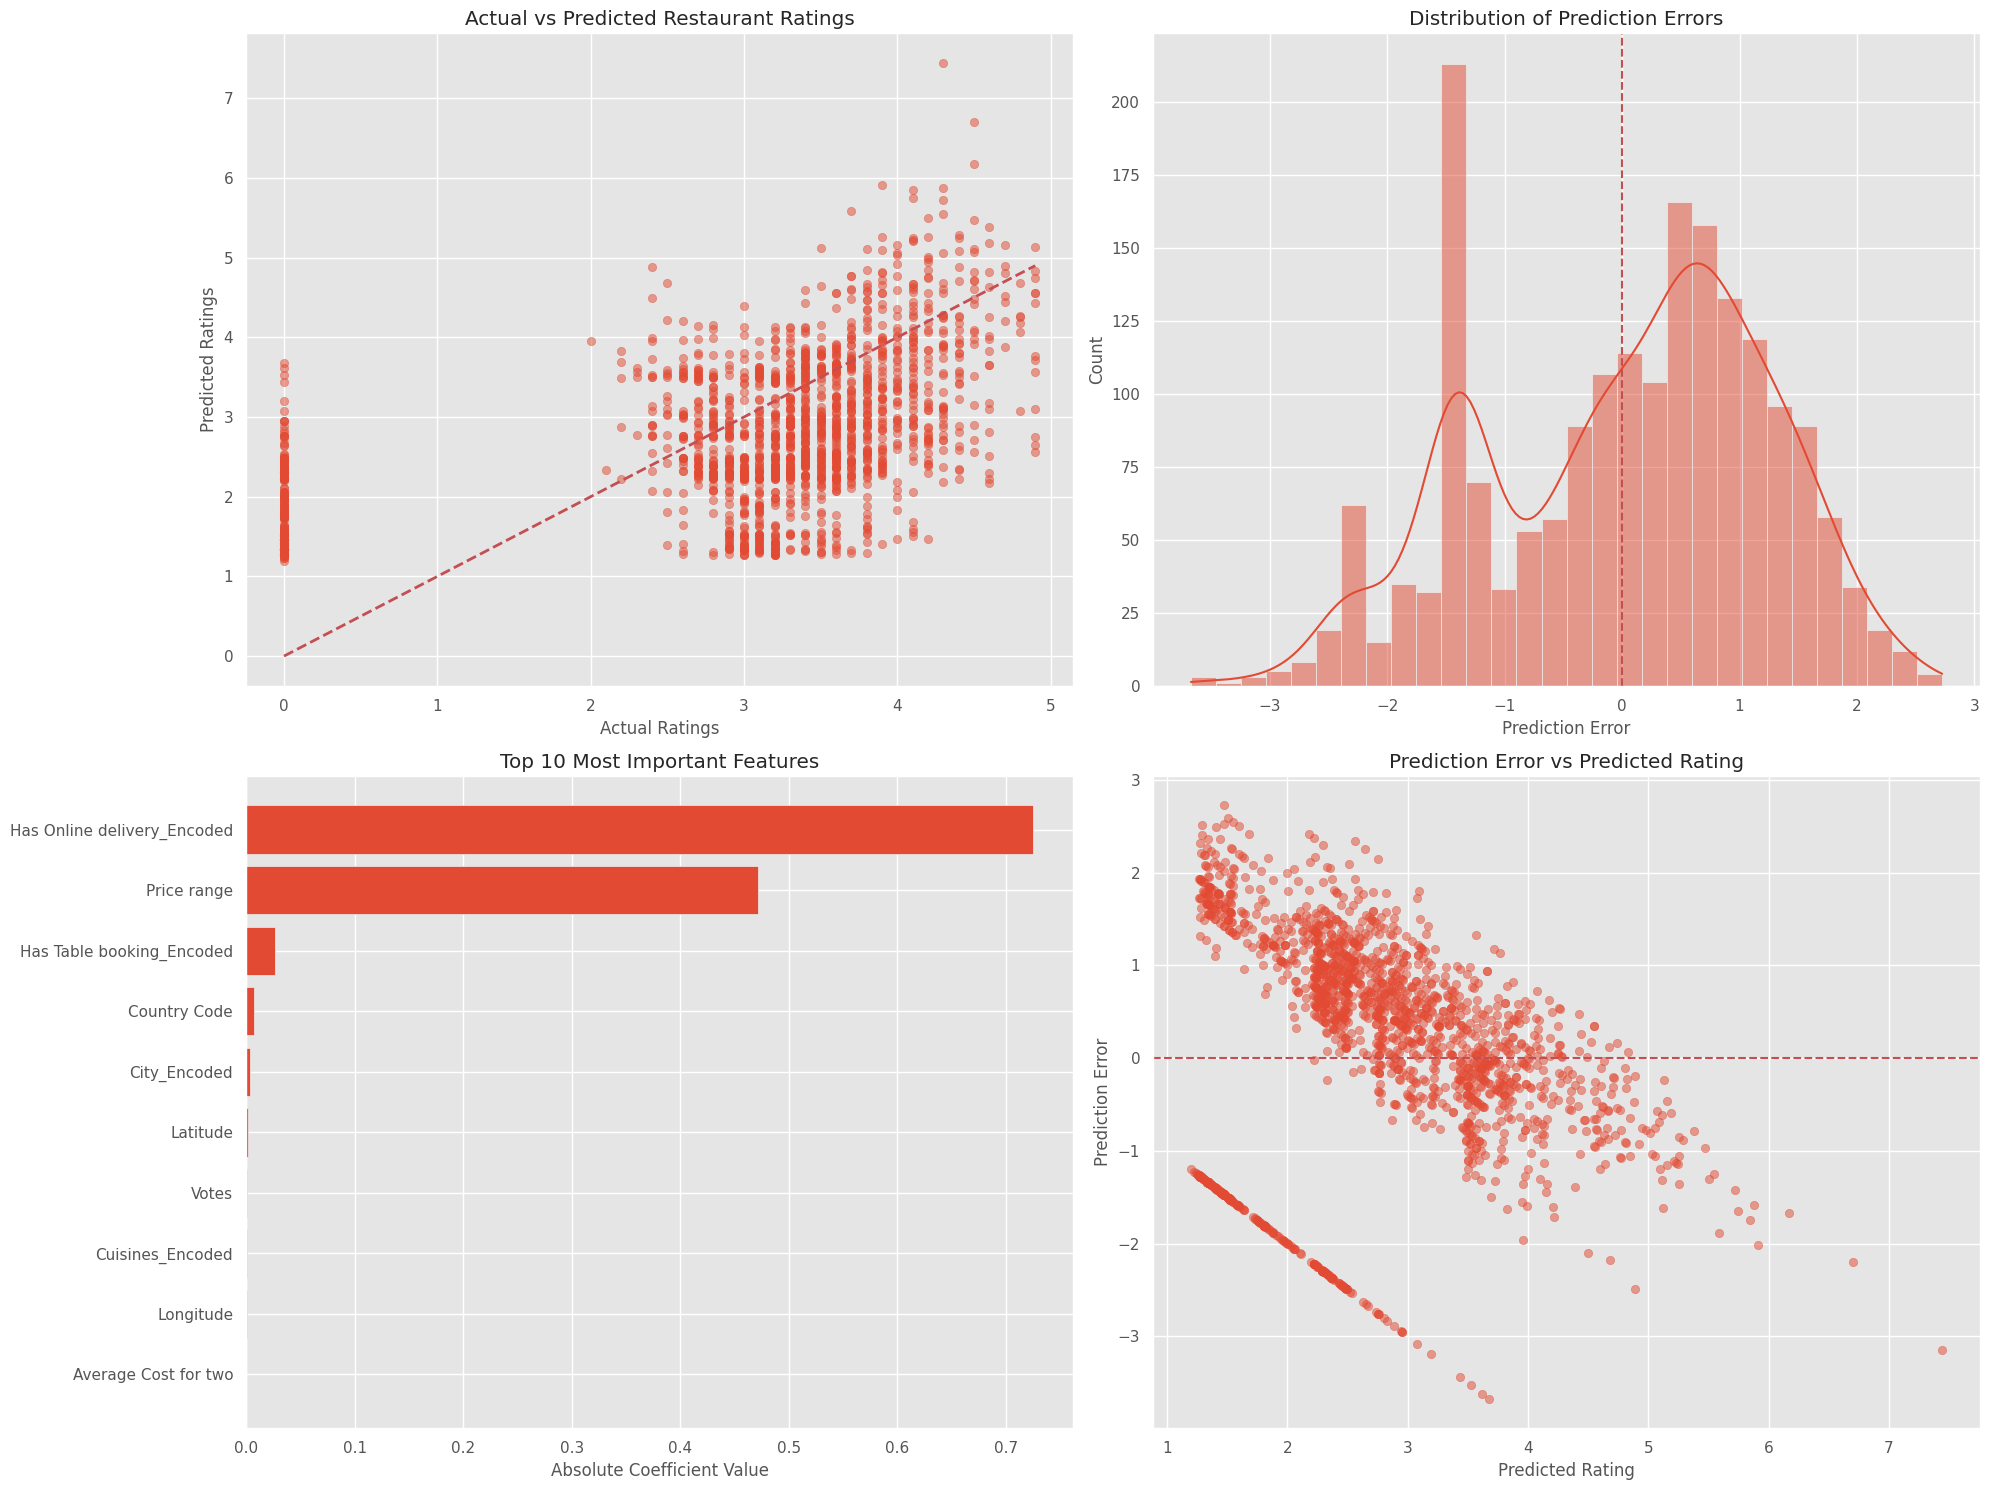

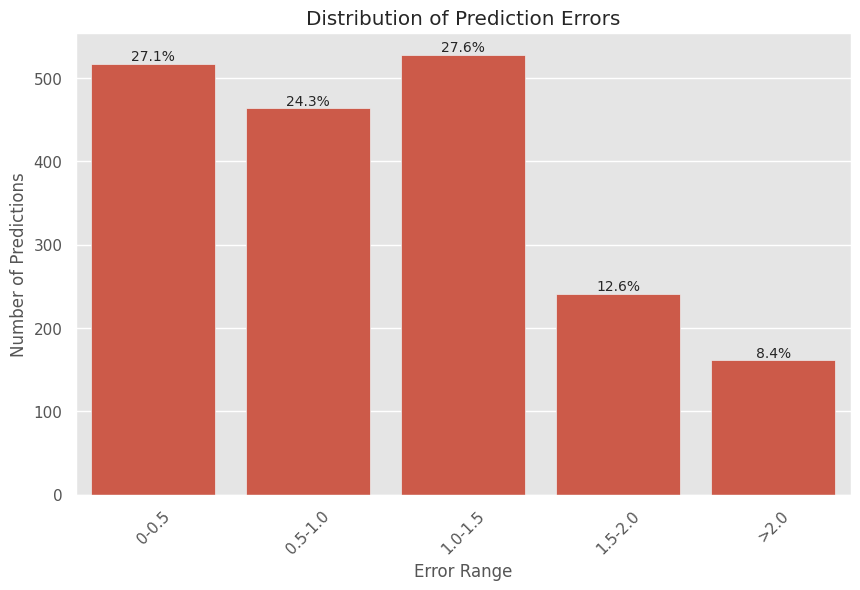

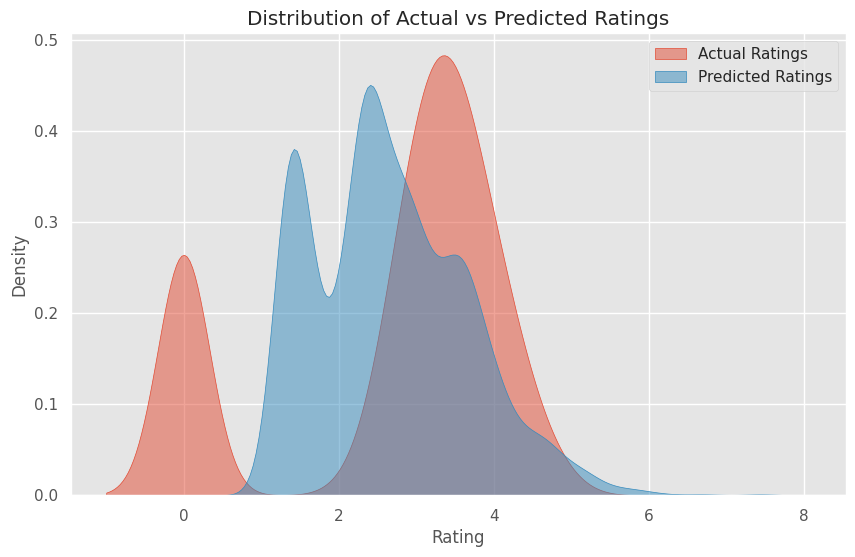


Prediction Performance Summary:
Total predictions: 1911
Mean absolute error: 1.02
Median absolute error: 0.96
90th percentile of absolute error: 1.88
95th percentile of absolute error: 2.29
R-squared score: 0.3557

Predictions with error 0-0.5: 517 (27.1%)

Predictions with error 0.5-1.0: 464 (24.3%)

Predictions with error 1.0-1.5: 528 (27.6%)

Predictions with error 1.5-2.0: 241 (12.6%)

Predictions with error > 2.0: 161 (8.4%)


In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

# Check available styles and use one that is available
available_styles = plt.style.available
if 'seaborn' in available_styles:
    plt.style.use('seaborn')
else:
    plt.style.use('ggplot')  # Fallback to another style

def create_model_performance_visualizations(y_test, y_pred, X, model):
    # Create a figure with subplots
    fig = plt.figure(figsize=(20, 15))
    
    # 1. Actual vs Predicted Values
    plt.subplot(2, 2, 1)
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Ratings')
    plt.ylabel('Predicted Ratings')
    plt.title('Actual vs Predicted Restaurant Ratings')
    
    # 2. Prediction Error Distribution
    plt.subplot(2, 2, 2)
    errors = y_test - y_pred
    sns.histplot(errors, kde=True, bins=30)
    plt.axvline(x=0, color='r', linestyle='--')
    plt.xlabel('Prediction Error')
    plt.ylabel('Count')
    plt.title('Distribution of Prediction Errors')
    
    # 3. Top 10 Feature Importance
    plt.subplot(2, 2, 3)
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': abs(model.coef_)
    }).sort_values('Importance', ascending=True)
    
    top_features = feature_importance.tail(10)
    plt.barh(range(10), top_features['Importance'])
    plt.yticks(range(10), top_features['Feature'])
    plt.xlabel('Absolute Coefficient Value')
    plt.title('Top 10 Most Important Features')
    
    # 4. Prediction Error vs Predicted Value
    plt.subplot(2, 2, 4)
    plt.scatter(y_pred, errors, alpha=0.5)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted Rating')
    plt.ylabel('Prediction Error')
    plt.title('Prediction Error vs Predicted Rating')
    
    plt.tight_layout()
    plt.show()

def plot_error_analysis(y_test, y_pred):
    # Create error ranges
    errors = abs(y_test - y_pred)
    error_ranges = pd.cut(errors, 
                         bins=[0, 0.5, 1.0, 1.5, 2.0, float('inf')],
                         labels=['0-0.5', '0.5-1.0', '1.0-1.5', '1.5-2.0', '>2.0'])
    
    # Plot error distribution
    plt.figure(figsize=(10, 6))
    error_counts = error_ranges.value_counts().sort_index()
    sns.barplot(x=error_counts.index, y=error_counts.values)
    plt.title('Distribution of Prediction Errors')
    plt.xlabel('Error Range')
    plt.ylabel('Number of Predictions')
    plt.xticks(rotation=45)
    
    # Add percentage labels on top of each bar
    total = len(error_ranges)
    for i, v in enumerate(error_counts.values):
        plt.text(i, v, f'{(v/total)*100:.1f}%', 
                horizontalalignment='center', 
                verticalalignment='bottom')
    
    plt.show()

def plot_rating_distributions(y_test, y_pred):
    plt.figure(figsize=(10, 6))
    
    # Plot distributions
    sns.kdeplot(data=y_test, label='Actual Ratings', fill=True, alpha=0.5)
    sns.kdeplot(data=y_pred, label='Predicted Ratings', fill=True, alpha=0.5)
    
    plt.xlabel('Rating')
    plt.ylabel('Density')
    plt.title('Distribution of Actual vs Predicted Ratings')
    plt.legend()
    plt.show()

def create_prediction_performance_summary(y_test, y_pred):
    errors = abs(y_test - y_pred)
    
    print("\nPrediction Performance Summary:")
    print(f"Total predictions: {len(y_test)}")
    print(f"Mean absolute error: {errors.mean():.2f}")
    print(f"Median absolute error: {np.median(errors):.2f}")
    print(f"90th percentile of absolute error: {np.percentile(errors, 90):.2f}")
    print(f"95th percentile of absolute error: {np.percentile(errors, 95):.2f}")
    print(f"R-squared score: {r2_score(y_test, y_pred):.4f}")

    # Error range distribution
    error_ranges = [0.5, 1.0, 1.5, 2.0]
    for i in range(len(error_ranges)):
        start = error_ranges[i-1] if i > 0 else 0
        end = error_ranges[i]
        count = sum((errors >= start) & (errors < end))
        percentage = (count / len(errors)) * 100
        print(f"\nPredictions with error {start}-{end}: {count} ({percentage:.1f}%)")
    
    count_large_errors = sum(errors >= error_ranges[-1])
    percentage_large_errors = (count_large_errors / len(errors)) * 100
    print(f"\nPredictions with error > {error_ranges[-1]}: {count_large_errors} ({percentage_large_errors:.1f}%)")

# Generate all visualizations and analysis
try:
    # Create main performance visualizations
    create_model_performance_visualizations(y_test, y_pred, X, model)
    
    # Plot error analysis
    plot_error_analysis(y_test, y_pred)
    
    # Plot rating distributions
    plot_rating_distributions(y_test, y_pred)
    
    # Create numerical summary
    create_prediction_performance_summary(y_test, y_pred)
    
except Exception as e:
    print(f"Error generating visualizations: {str(e)}")
    print("Please ensure you have run the model training code first and have y_test, y_pred, X, and model variables available.")

Experiment with different algorithms (e.g.linear regression, decision trees, random forest) and compare their performance.

Task: Customer Preference Analysis
Analyze the relationship between the type of cuisine and the restaurant's rating.

/tmp/ipykernel_214478/517313545.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Aggregate rating', y='Cuisines', data=cuisine_ratings, palette='viridis')


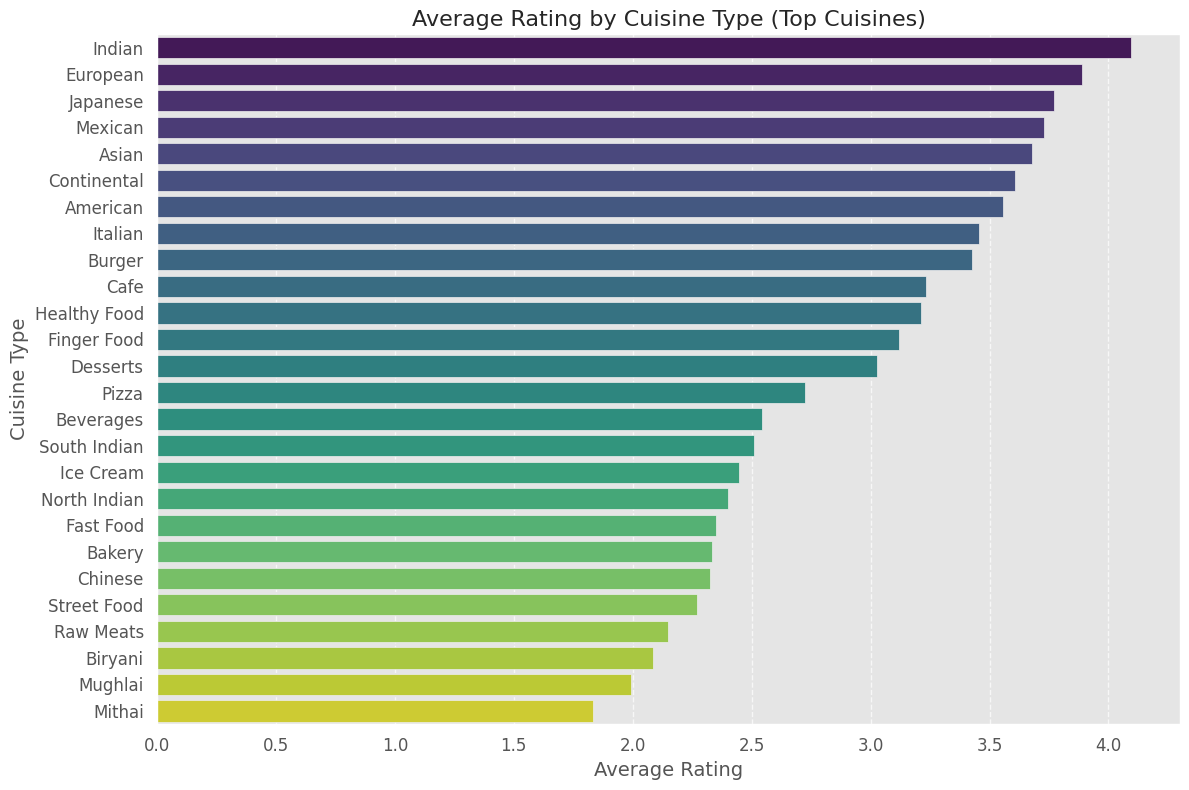

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Data Preprocessing
# Drop rows with missing 'Cuisines' or 'Aggregate rating'
data = data.dropna(subset=['Cuisines', 'Aggregate rating'])

# Split the 'Cuisines' column into individual cuisine types and explode into separate rows
data['Cuisines'] = data['Cuisines'].str.split(', ')
data_exploded = data.explode('Cuisines')

# Step 2: Filter out cuisines with low representation (e.g., fewer than 50 restaurants)
cuisine_counts = data_exploded['Cuisines'].value_counts()
cuisines_to_keep = cuisine_counts[cuisine_counts >= 50].index  # Keep cuisines with at least 50 restaurants
data_filtered = data_exploded[data_exploded['Cuisines'].isin(cuisines_to_keep)]

# Step 3: Group by 'Cuisines' and calculate the average rating
cuisine_ratings = data_filtered.groupby('Cuisines')['Aggregate rating'].mean().reset_index()

# Sort by 'Aggregate rating' for better visualization
cuisine_ratings = cuisine_ratings.sort_values(by='Aggregate rating', ascending=False)

# Step 4: Visualization using a horizontal bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Aggregate rating', y='Cuisines', data=cuisine_ratings, palette='viridis')
plt.title('Average Rating by Cuisine Type (Top Cuisines)', fontsize=16)
plt.xlabel('Average Rating', fontsize=14)
plt.ylabel('Cuisine Type', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [58]:
cuisine_ratings['Restaurant Count'] = data_filtered.groupby('Cuisines')['Aggregate rating'].count().values
print(cuisine_ratings)

        Cuisines  Aggregate rating  Restaurant Count
15        Indian          4.096078               278
10      European          3.887097                77
17      Japanese          3.769444               621
18       Mexican          3.730645                79
1          Asian          3.676623               112
8    Continental          3.606809               116
0       American          3.555755               617
16       Italian          3.453846               855
5         Burger          3.425000               235
6           Cafe          3.232415               150
13  Healthy Food          3.212500                62
12   Finger Food          3.120513               672
9       Desserts          3.025333                78
22         Pizza          2.725000                56
3      Beverages          2.544304               178
24  South Indian          2.509160                51
14     Ice Cream          2.448876               234
21  North Indian          2.399699            

/tmp/ipykernel_214478/2463974762.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Aggregate rating', y='Cuisines', data=top_10_cuisines, palette='viridis')


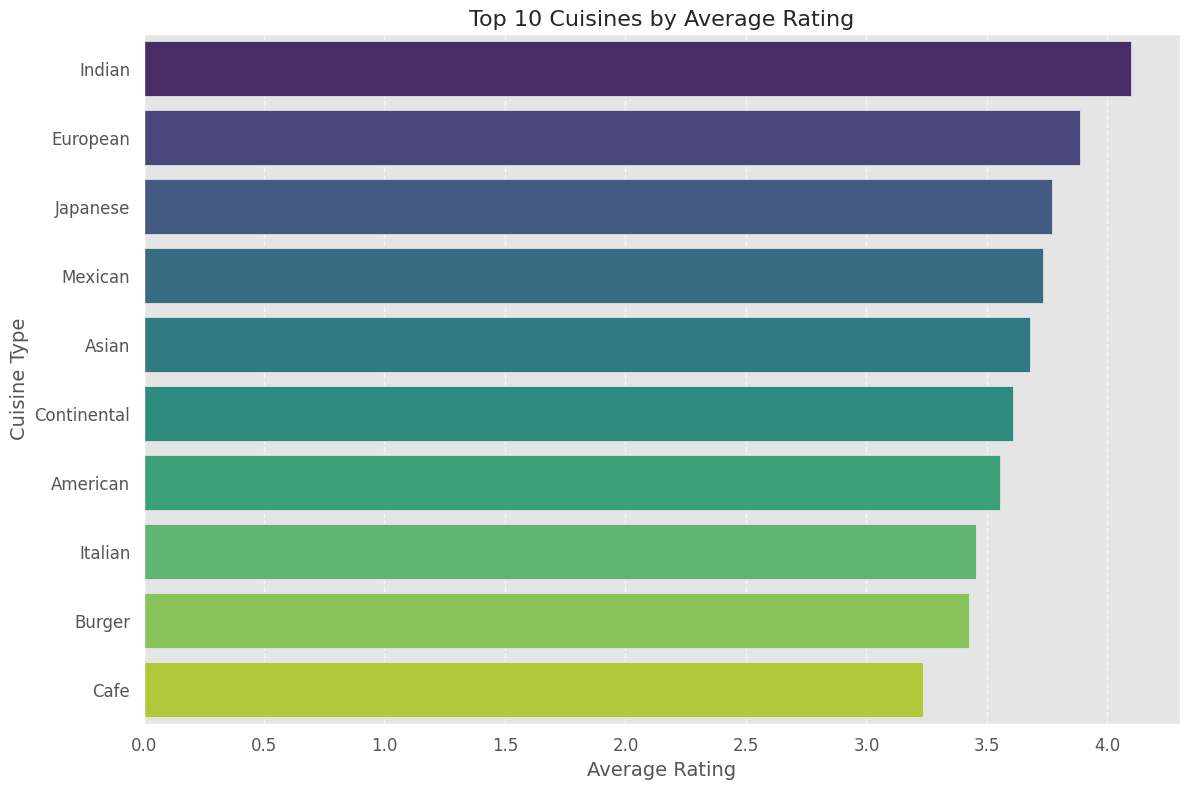

In [59]:
top_10_cuisines = cuisine_ratings.head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x='Aggregate rating', y='Cuisines', data=top_10_cuisines, palette='viridis')
plt.title('Top 10 Cuisines by Average Rating', fontsize=16)
plt.xlabel('Average Rating', fontsize=14)
plt.ylabel('Cuisine Type', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Identify the most popular cuisines among customers based on the number of votes.

Top 10 Most Popular Cuisines by Votes:
         Cuisines   Votes
100  North Indian  595981
34        Chinese  364351
70        Italian  329265
37    Continental  288255
49      Fast Food  184058
2        American  183117
27           Cafe  177568
95        Mughlai  151946
42       Desserts  105889
7           Asian  104303


/tmp/ipykernel_214478/1510920665.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Votes', y='Cuisines', data=cuisine_votes.head(20), palette='viridis')  # Top 20 cuisines


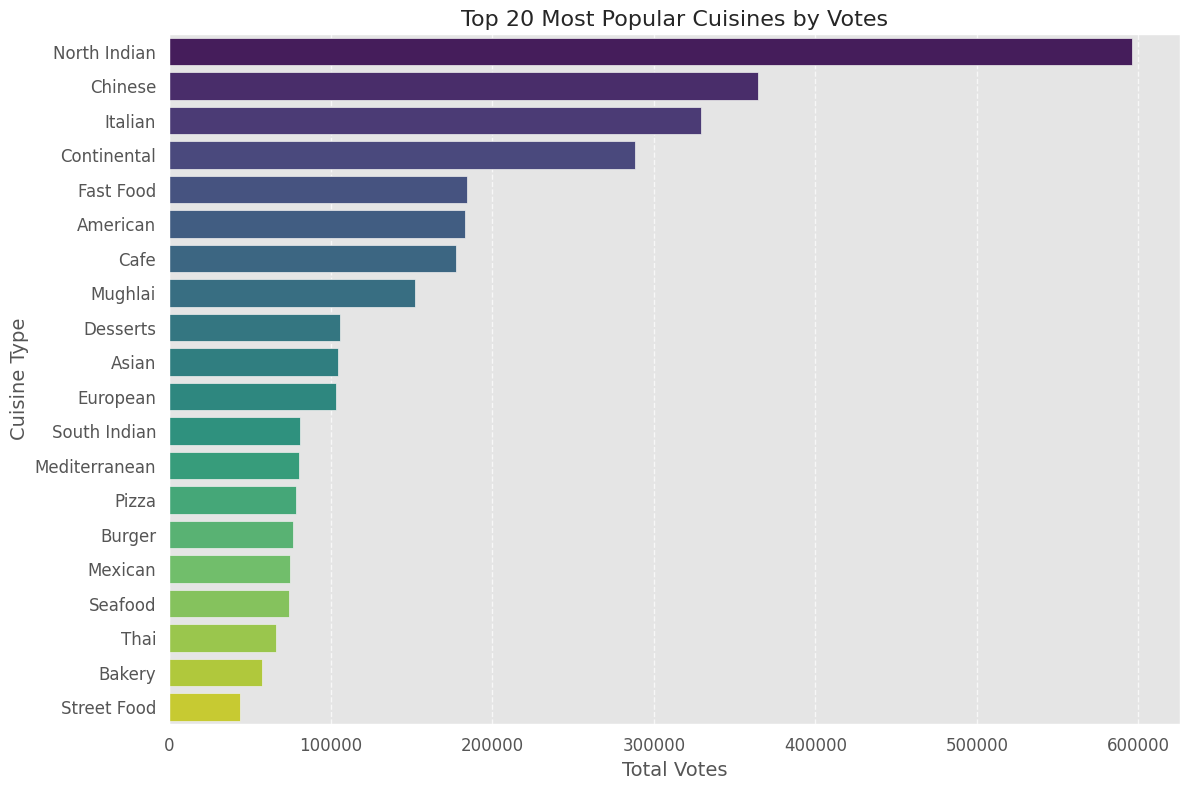

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the dataset
data = pd.read_csv('/media/cair/BACKUP_1/yogesh/confyz/confyz/Dataset .csv')  # Replace with your file path

# Step 2: Data Preprocessing
# Drop rows with missing 'Cuisines' or 'Votes'
data = data.dropna(subset=['Cuisines', 'Votes'])

# Split the 'Cuisines' column into individual cuisine types and explode into separate rows
data['Cuisines'] = data['Cuisines'].str.split(', ')
data_exploded = data.explode('Cuisines')

# Step 3: Group by 'Cuisines' and calculate the total number of votes
cuisine_votes = data_exploded.groupby('Cuisines')['Votes'].sum().reset_index()

# Sort by total votes in descending order
cuisine_votes = cuisine_votes.sort_values(by='Votes', ascending=False)

# Display the top 10 most popular cuisines
print("Top 10 Most Popular Cuisines by Votes:")
print(cuisine_votes.head(10))

# Step 4: Visualization using a horizontal bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Votes', y='Cuisines', data=cuisine_votes.head(20), palette='viridis')  # Top 20 cuisines
plt.title('Top 20 Most Popular Cuisines by Votes', fontsize=16)
plt.xlabel('Total Votes', fontsize=14)
plt.ylabel('Cuisine Type', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [66]:
cuisine_avg_votes = data_filtered.groupby('Cuisines')['Votes'].mean().reset_index()
cuisine_avg_votes = cuisine_avg_votes.sort_values(by='Votes', ascending=False)
print("Top 10 Cuisines by Average Votes per Restaurant:")
print(cuisine_avg_votes.head(10))

Top 10 Cuisines by Average Votes per Restaurant:
         Cuisines       Votes
19  Mediterranean  719.089286
10       European  698.033784
0        American  469.530769
1           Asian  447.652361
27       Sandwich  443.396226
16        Italian  430.975131
28        Seafood  426.747126
30          Steak  414.145161
20        Mexican  412.972376
8     Continental  391.650815


Determine if there are any specific cuisines that tend to receive higher ratings.

Top 10 Cuisines by Average Rating:
       Cuisines  Aggregate rating
130       Sunda          4.900000
26       B�_rek          4.700000
132   Taiwanese          4.650000
112       Ramen          4.500000
43      Dim Sum          4.466667
61     Hawaiian          4.412500
23   Bubble Tea          4.400000
47       D�_ner          4.400000
40        Curry          4.400000
75        Kebab          4.380000


/tmp/ipykernel_214478/430164500.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Aggregate rating', y='Cuisines', data=cuisine_ratings.head(20), palette='viridis')  # Top 20 cuisines


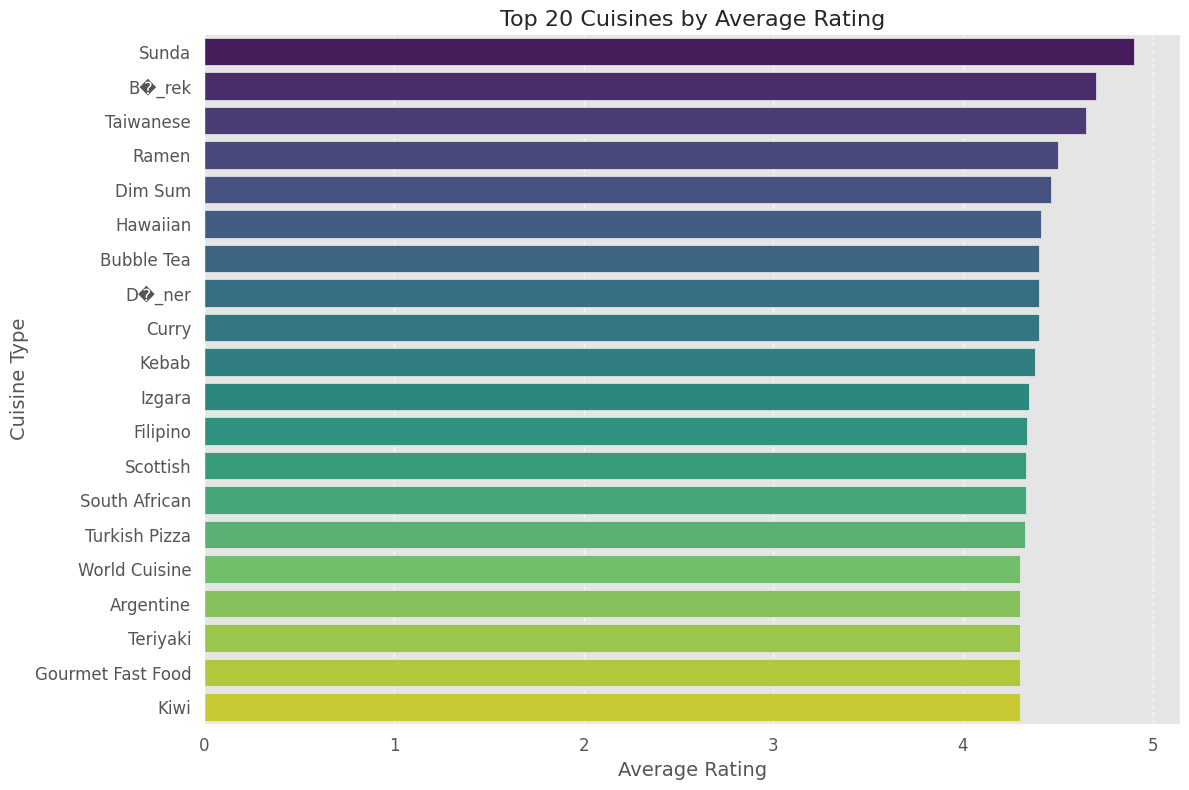

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv('/media/cair/BACKUP_1/yogesh/confyz/confyz/Dataset .csv')

# Step 2: Data Preprocessing
# Drop rows with missing 'Cuisines' or 'Aggregate rating'
data = data.dropna(subset=['Cuisines', 'Aggregate rating'])

# Split the 'Cuisines' column into individual cuisine types and explode into separate rows
data['Cuisines'] = data['Cuisines'].str.split(', ')
data_exploded = data.explode('Cuisines')

# Step 3: Group by 'Cuisines' and calculate the average rating
cuisine_ratings = data_exploded.groupby('Cuisines')['Aggregate rating'].mean().reset_index()

# Sort by average rating in descending order
cuisine_ratings = cuisine_ratings.sort_values(by='Aggregate rating', ascending=False)

# Display the top 10 cuisines with the highest average ratings
print("Top 10 Cuisines by Average Rating:")
print(cuisine_ratings.head(10))

# Step 4: Visualization using a horizontal bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Aggregate rating', y='Cuisines', data=cuisine_ratings.head(20), palette='viridis')  # Top 20 cuisines
plt.title('Top 20 Cuisines by Average Rating', fontsize=16)
plt.xlabel('Average Rating', fontsize=14)
plt.ylabel('Cuisine Type', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [69]:
cuisine_counts = data_exploded['Cuisines'].value_counts()
cuisines_to_keep = cuisine_counts[cuisine_counts >= 50].index  # Keep cuisines with at least 50 restaurants
data_filtered = data_exploded[data_exploded['Cuisines'].isin(cuisines_to_keep)]

/tmp/ipykernel_214478/3363151845.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cuisines', y='Aggregate rating', data=data_top_cuisines, palette='viridis')


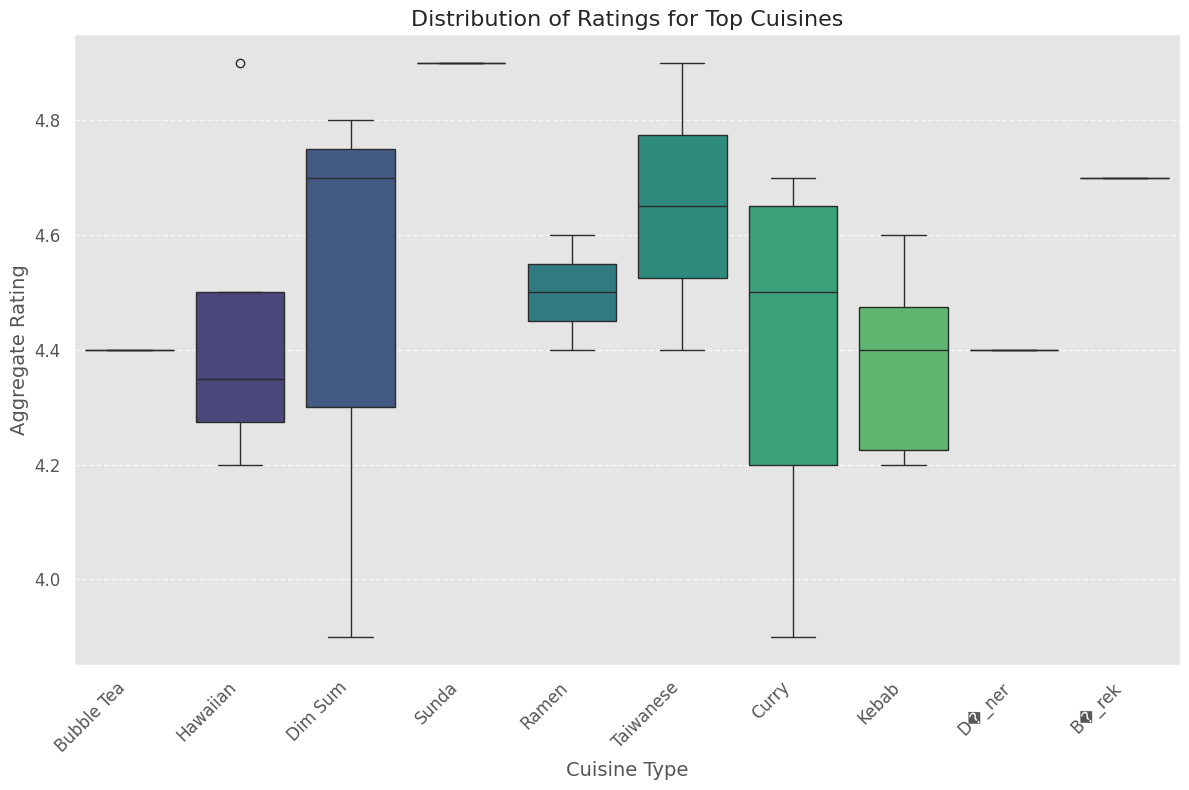

In [70]:
top_cuisines = cuisine_ratings.head(10)['Cuisines']
data_top_cuisines = data_exploded[data_exploded['Cuisines'].isin(top_cuisines)]

plt.figure(figsize=(12, 8))
sns.boxplot(x='Cuisines', y='Aggregate rating', data=data_top_cuisines, palette='viridis')
plt.title('Distribution of Ratings for Top Cuisines', fontsize=16)
plt.xlabel('Cuisine Type', fontsize=14)
plt.ylabel('Aggregate Rating', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Task: Data Visualization

Create visualizations to represent the distribution of ratings using different charts (histogram, barplot, etc.).

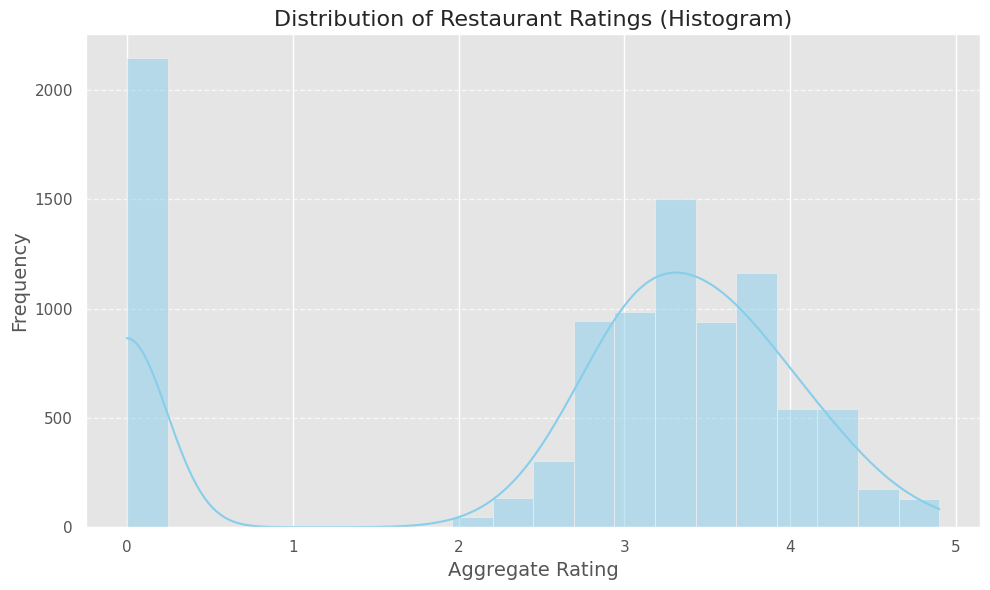

/tmp/ipykernel_214478/2547730473.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='viridis')


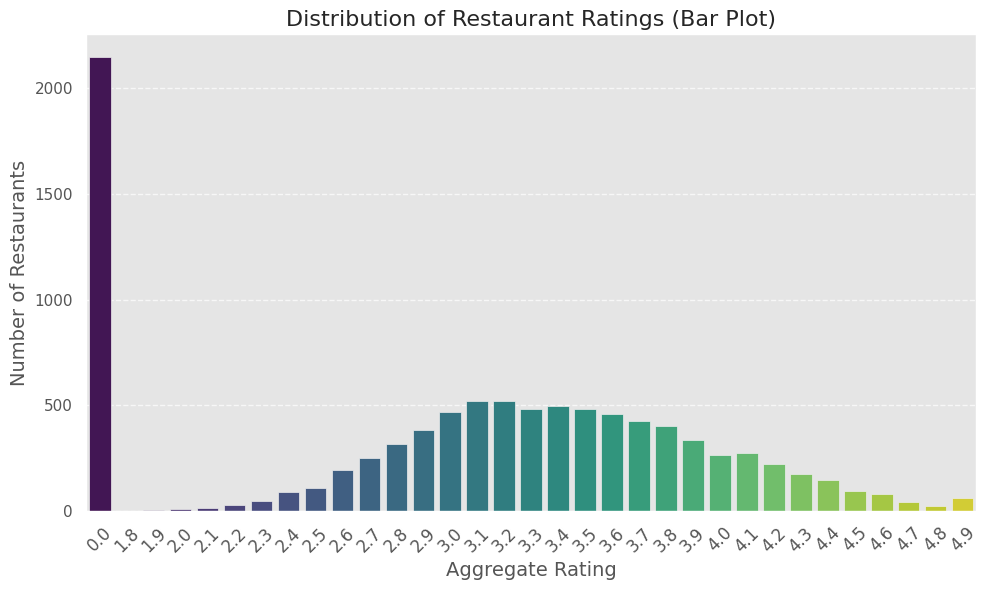

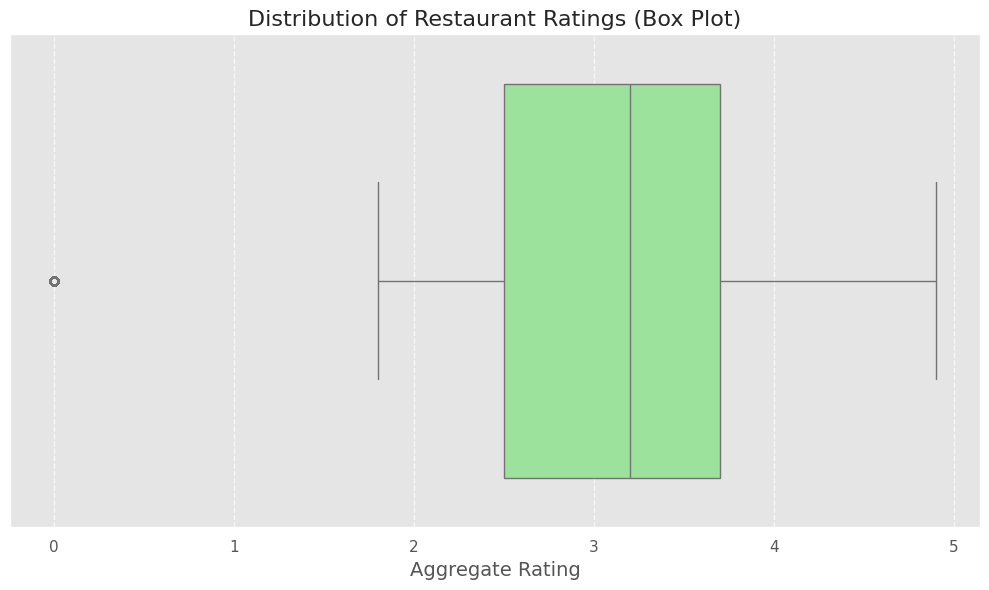

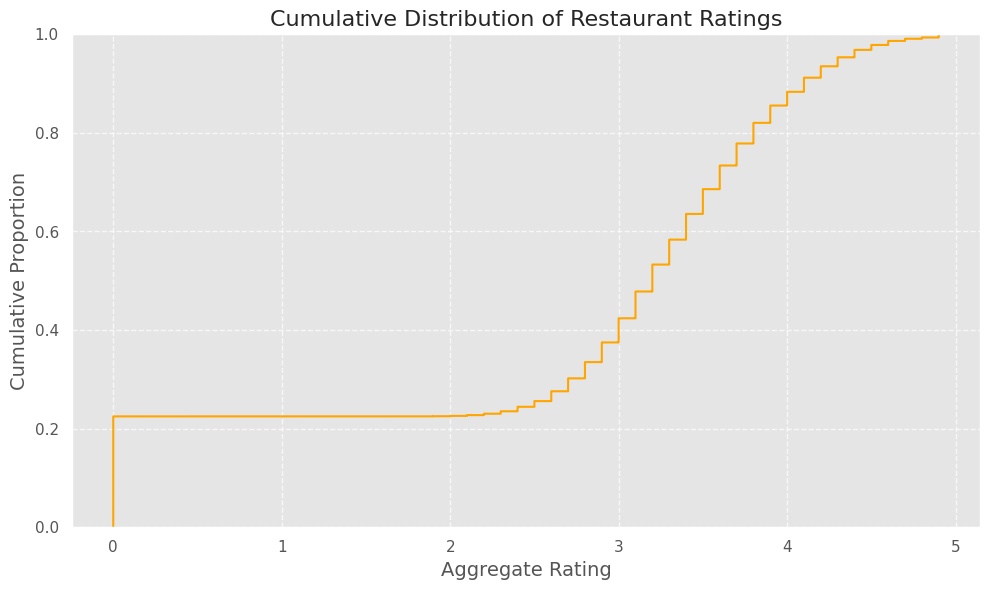

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/media/cair/BACKUP_1/yogesh/confyz/confyz/Dataset .csv')

# Step 1: Data Preprocessing
# Drop rows with missing 'Aggregate rating'
data = data.dropna(subset=['Aggregate rating'])

# Step 2: Create Visualizations

# Visualization 1: Histogram of Ratings
plt.figure(figsize=(10, 6))
sns.histplot(data['Aggregate rating'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Restaurant Ratings (Histogram)', fontsize=16)
plt.xlabel('Aggregate Rating', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Visualization 2: Bar Plot of Rating Counts
plt.figure(figsize=(10, 6))
rating_counts = data['Aggregate rating'].value_counts().sort_index()
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette='viridis')
plt.title('Distribution of Restaurant Ratings (Bar Plot)', fontsize=16)
plt.xlabel('Aggregate Rating', fontsize=14)
plt.ylabel('Number of Restaurants', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Visualization 3: Box Plot of Ratings
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['Aggregate rating'], color='lightgreen')
plt.title('Distribution of Restaurant Ratings (Box Plot)', fontsize=16)
plt.xlabel('Aggregate Rating', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Visualization 4: Cumulative Distribution Function (CDF) of Ratings
plt.figure(figsize=(10, 6))
sns.ecdfplot(data['Aggregate rating'], color='orange')
plt.title('Cumulative Distribution of Restaurant Ratings', fontsize=16)
plt.xlabel('Aggregate Rating', fontsize=14)
plt.ylabel('Cumulative Proportion', fontsize=14)
plt.grid(linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

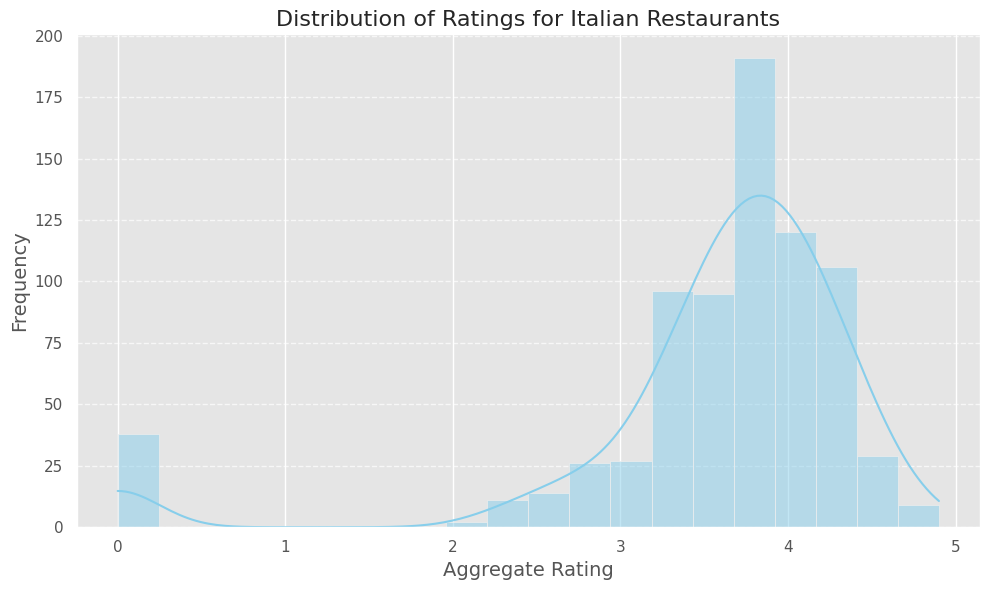

In [72]:
specific_cuisine = 'Italian'  # Replace with the cuisine of interest
filtered_data = data[data['Cuisines'].str.contains(specific_cuisine, na=False)]

plt.figure(figsize=(10, 6))
sns.histplot(filtered_data['Aggregate rating'], bins=20, kde=True, color='skyblue')
plt.title(f'Distribution of Ratings for {specific_cuisine} Restaurants', fontsize=16)
plt.xlabel('Aggregate Rating', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

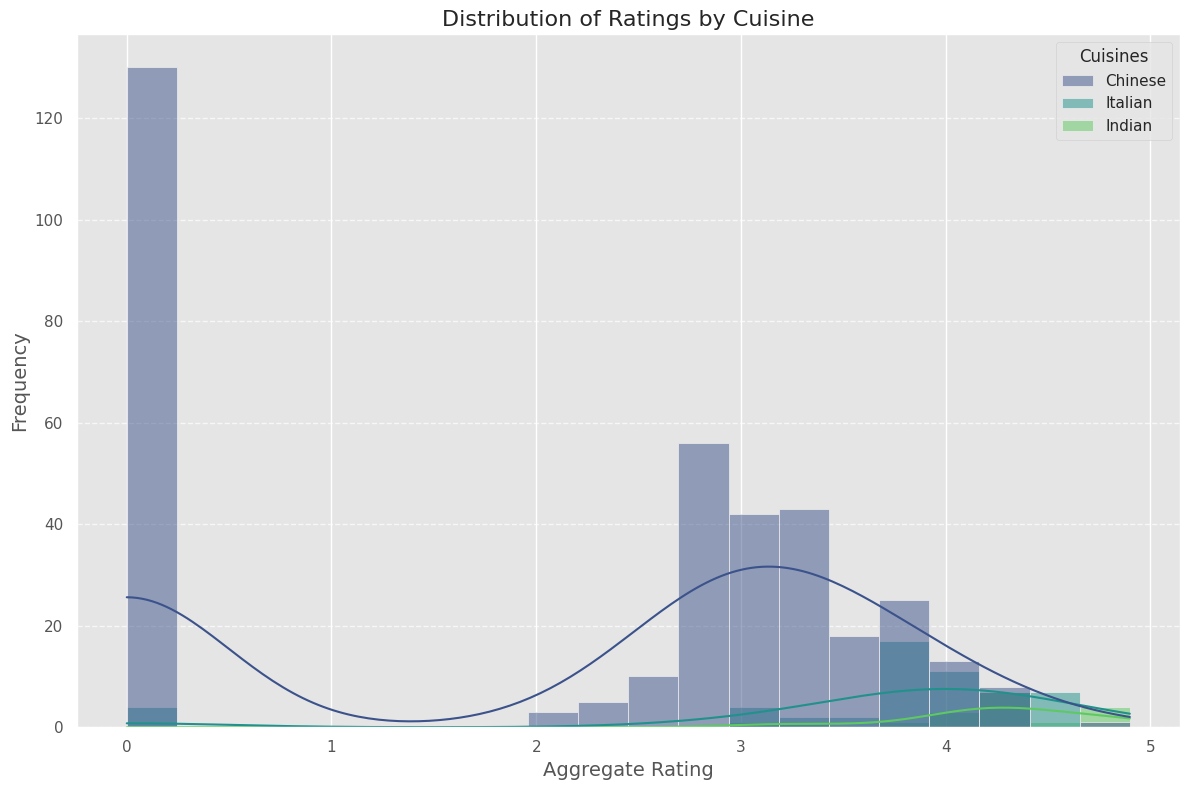

In [73]:
cuisines_to_compare = ['Italian', 'Chinese', 'Indian']  # Replace with cuisines of interest
filtered_data = data[data['Cuisines'].isin(cuisines_to_compare)]

plt.figure(figsize=(12, 8))
sns.histplot(data=filtered_data, x='Aggregate rating', hue='Cuisines', bins=20, kde=True, palette='viridis')
plt.title('Distribution of Ratings by Cuisine', fontsize=16)
plt.xlabel('Aggregate Rating', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Compare the average ratings of different cuisines or cities using appropriate visualizations.

/tmp/ipykernel_214478/2311997324.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Aggregate rating', y='Cuisines', data=cuisine_ratings.head(20), palette='viridis')


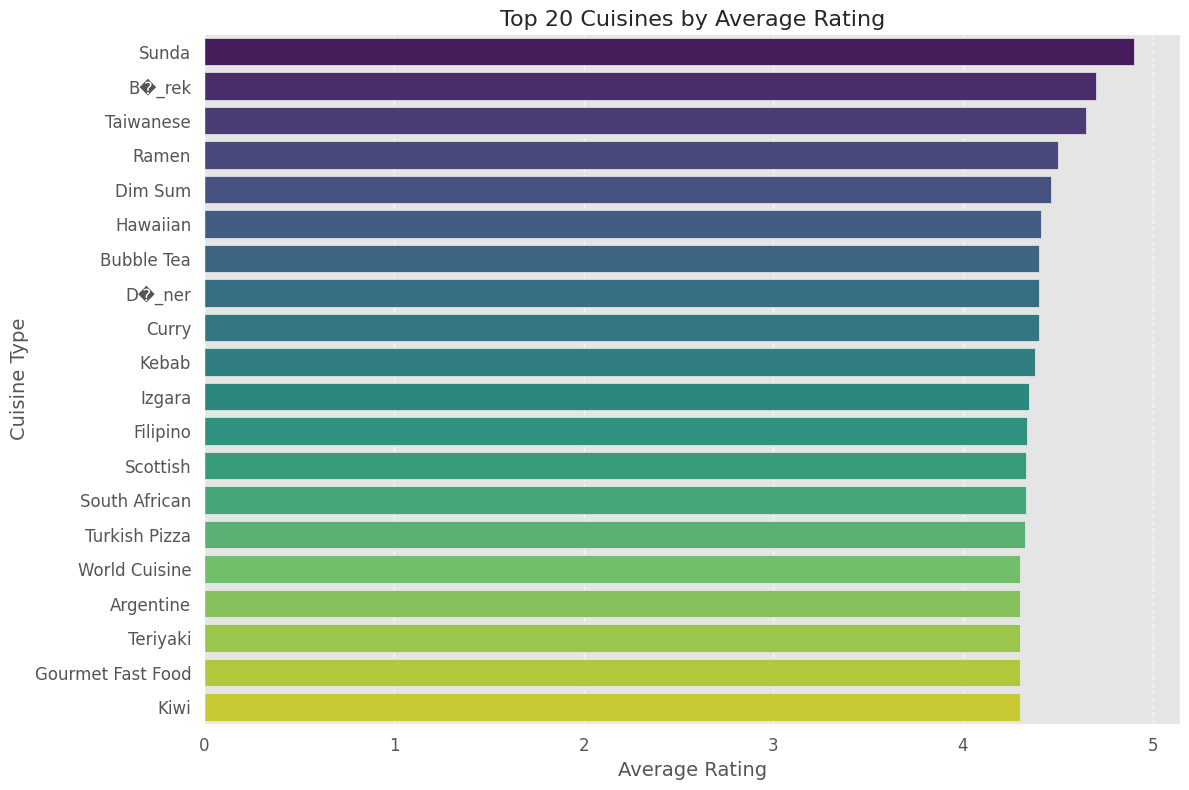

/tmp/ipykernel_214478/2311997324.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Aggregate rating', y='City', data=city_ratings.head(20), palette='magma')


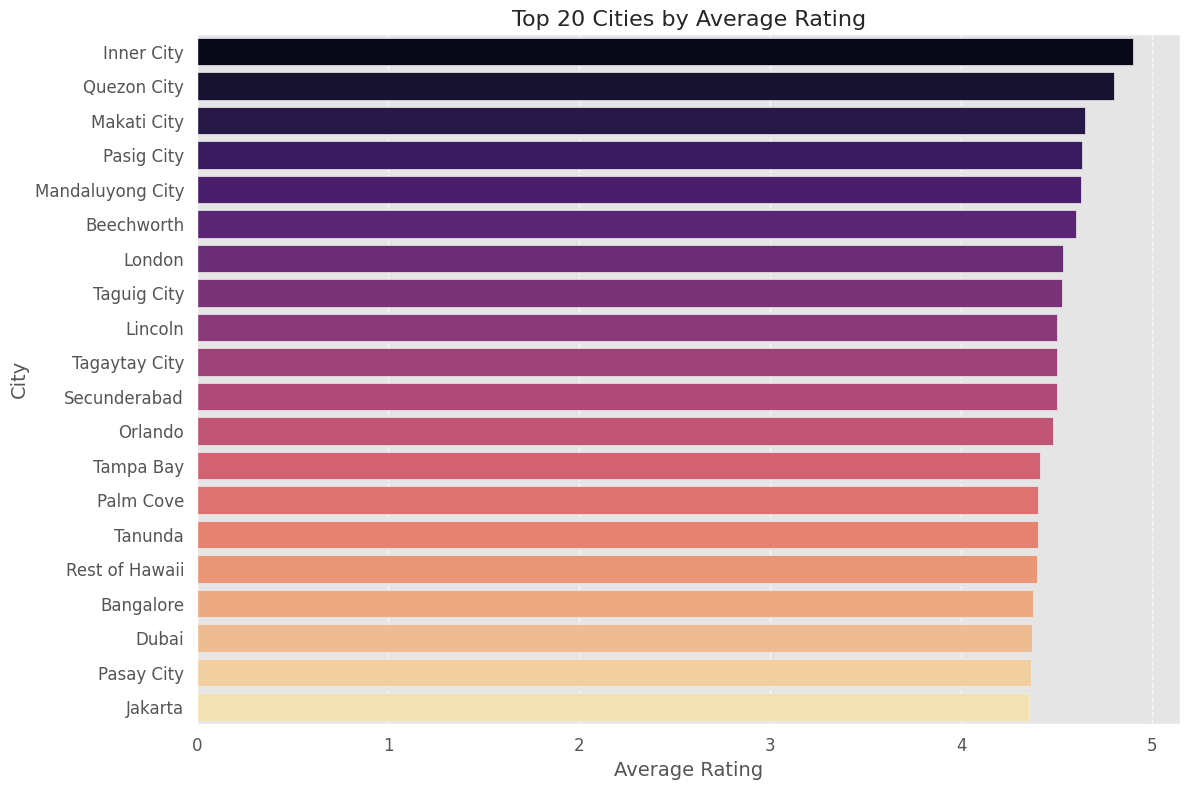

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/media/cair/BACKUP_1/yogesh/confyz/confyz/Dataset .csv')  

# Step 1: Data Preprocessing
# Drop rows with missing 'Cuisines', 'City', or 'Aggregate rating'
data = data.dropna(subset=['Cuisines', 'City', 'Aggregate rating'])

# Split the 'Cuisines' column into individual cuisine types and explode into separate rows
data['Cuisines'] = data['Cuisines'].str.split(', ')
data_exploded = data.explode('Cuisines')

# Step 2: Compare Average Ratings by Cuisine
# Group by 'Cuisines' and calculate the average rating
cuisine_ratings = data_exploded.groupby('Cuisines')['Aggregate rating'].mean().reset_index()

# Sort by average rating in descending order
cuisine_ratings = cuisine_ratings.sort_values(by='Aggregate rating', ascending=False)

# Visualization 1: Bar Plot for Top 20 Cuisines by Average Rating
plt.figure(figsize=(12, 8))
sns.barplot(x='Aggregate rating', y='Cuisines', data=cuisine_ratings.head(20), palette='viridis')
plt.title('Top 20 Cuisines by Average Rating', fontsize=16)
plt.xlabel('Average Rating', fontsize=14)
plt.ylabel('Cuisine Type', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Step 3: Compare Average Ratings by City
# Group by 'City' and calculate the average rating
city_ratings = data.groupby('City')['Aggregate rating'].mean().reset_index()

# Sort by average rating in descending order
city_ratings = city_ratings.sort_values(by='Aggregate rating', ascending=False)

# Visualization 2: Bar Plot for Top 20 Cities by Average Rating
plt.figure(figsize=(12, 8))
sns.barplot(x='Aggregate rating', y='City', data=city_ratings.head(20), palette='magma')
plt.title('Top 20 Cities by Average Rating', fontsize=16)
plt.xlabel('Average Rating', fontsize=14)
plt.ylabel('City', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [75]:
# For cuisines
cuisine_counts = data_exploded['Cuisines'].value_counts()
cuisines_to_keep = cuisine_counts[cuisine_counts >= 50].index  # Keep cuisines with at least 50 restaurants
data_filtered_cuisines = data_exploded[data_exploded['Cuisines'].isin(cuisines_to_keep)]

# For cities
city_counts = data['City'].value_counts()
cities_to_keep = city_counts[city_counts >= 50].index  # Keep cities with at least 50 restaurants
data_filtered_cities = data[data['City'].isin(cities_to_keep)]

Compare ratings for specific cuisines across cities

/tmp/ipykernel_214478/815652775.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Aggregate rating', y='City', data=city_ratings_cuisine.head(20), palette='plasma')


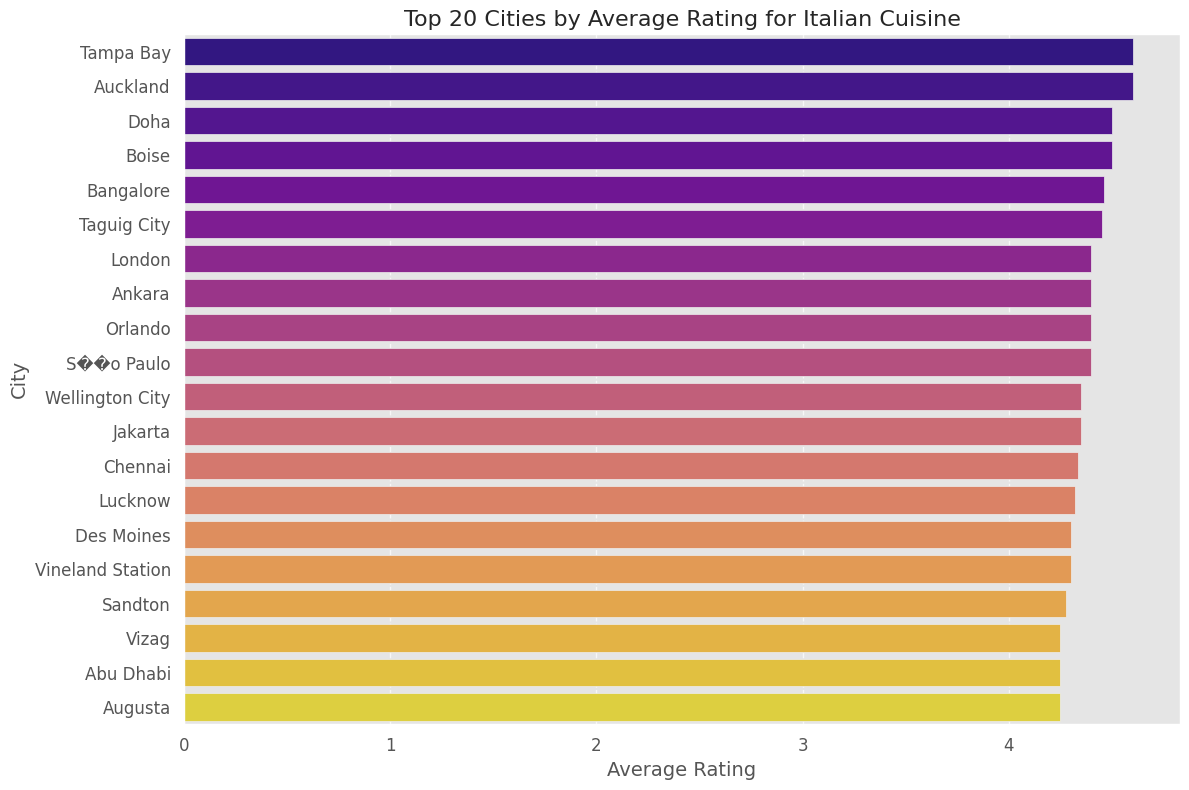

In [76]:
specific_cuisine = 'Italian'  # Replace with the cuisine of interest
filtered_data = data_exploded[data_exploded['Cuisines'] == specific_cuisine]

city_ratings_cuisine = filtered_data.groupby('City')['Aggregate rating'].mean().reset_index()
city_ratings_cuisine = city_ratings_cuisine.sort_values(by='Aggregate rating', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Aggregate rating', y='City', data=city_ratings_cuisine.head(20), palette='plasma')
plt.title(f'Top 20 Cities by Average Rating for {specific_cuisine} Cuisine', fontsize=16)
plt.xlabel('Average Rating', fontsize=14)
plt.ylabel('City', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Visualize the relationship between various features and the target variable to gain insights.

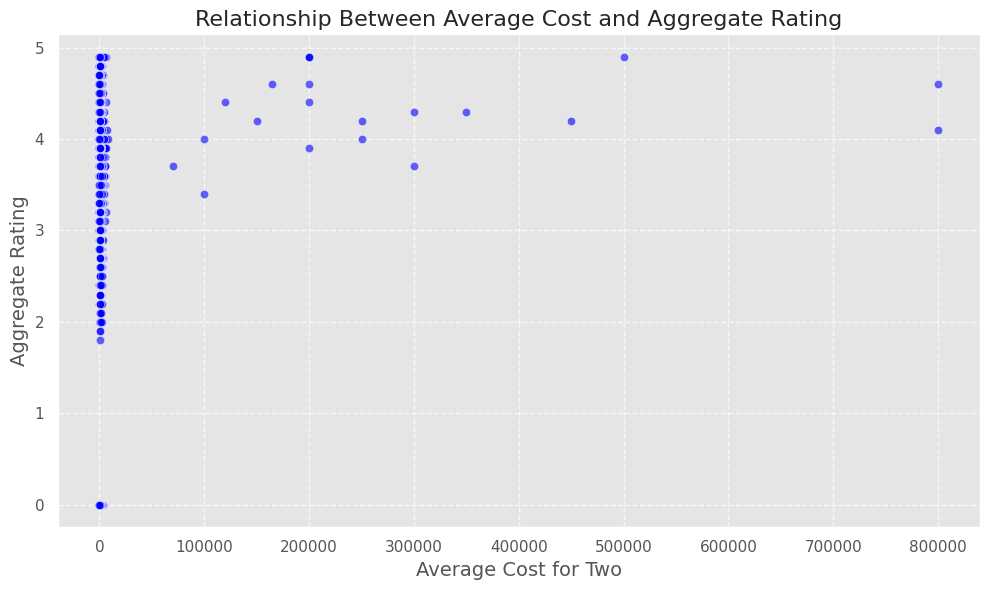

/tmp/ipykernel_214478/4266499104.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Price range', y='Aggregate rating', data=data, palette='viridis')


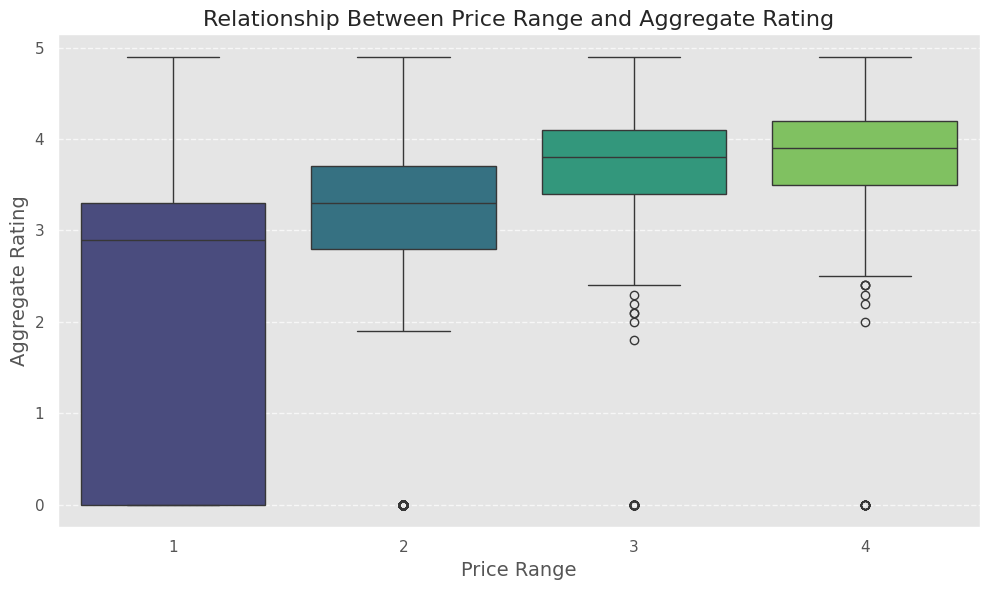

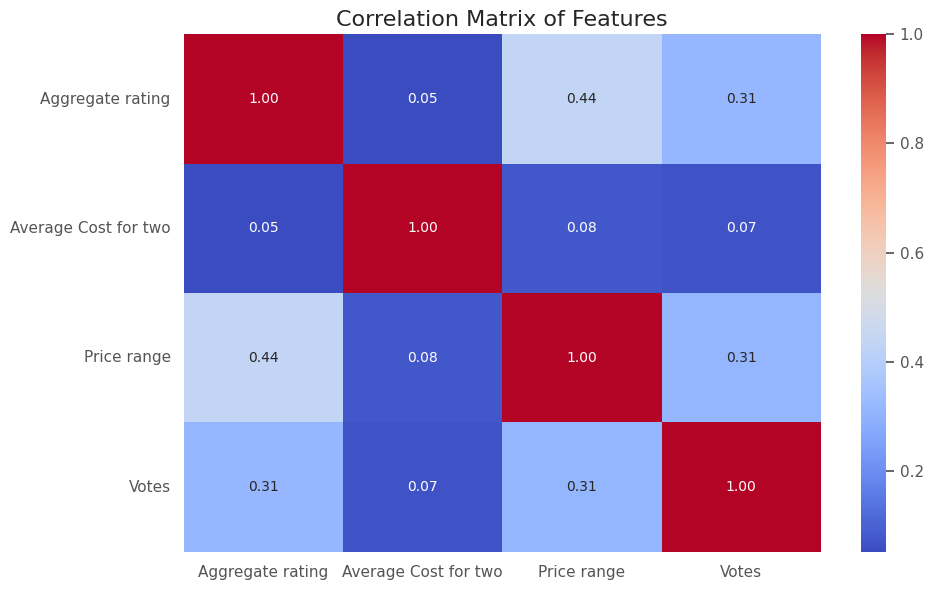

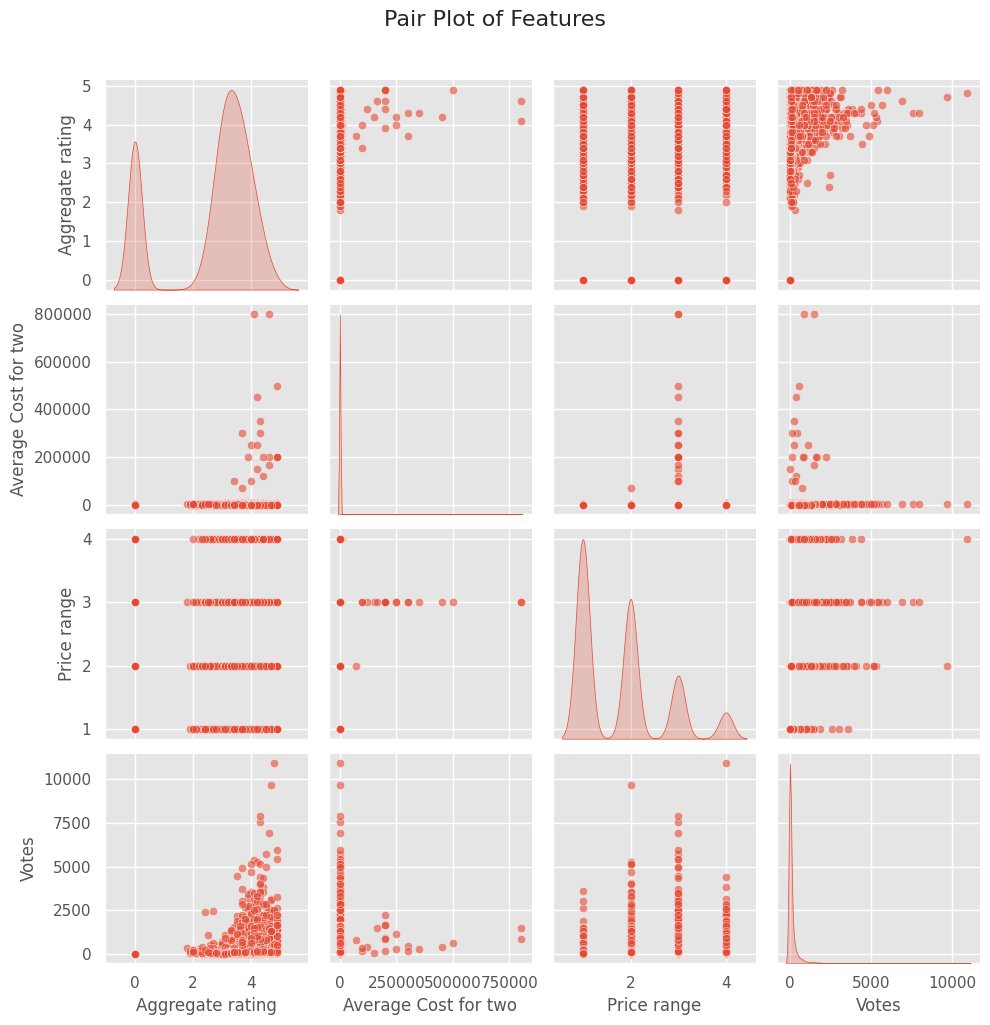

/tmp/ipykernel_214478/4266499104.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Has Online delivery', y='Aggregate rating', data=data, palette='magma')


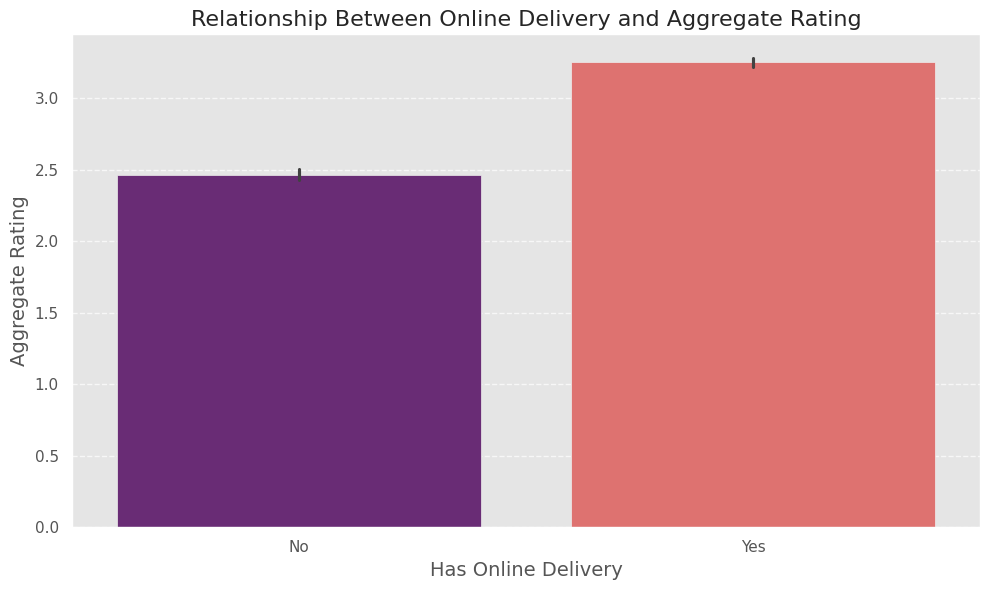

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv('/media/cair/BACKUP_1/yogesh/confyz/confyz/Dataset .csv')

# Step 1: Data Preprocessing
# Drop rows with missing values in key columns
data = data.dropna(subset=['Aggregate rating', 'Average Cost for two', 'Price range', 'Votes'])

# Step 2: Visualize Relationships

# Visualization 1: Scatter Plot - Average Cost for two vs Aggregate Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Average Cost for two', y='Aggregate rating', data=data, alpha=0.6, color='blue')
plt.title('Relationship Between Average Cost and Aggregate Rating', fontsize=16)
plt.xlabel('Average Cost for Two', fontsize=14)
plt.ylabel('Aggregate Rating', fontsize=14)
plt.grid(linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Visualization 2: Box Plot - Price Range vs Aggregate Rating
plt.figure(figsize=(10, 6))
sns.boxplot(x='Price range', y='Aggregate rating', data=data, palette='viridis')
plt.title('Relationship Between Price Range and Aggregate Rating', fontsize=16)
plt.xlabel('Price Range', fontsize=14)
plt.ylabel('Aggregate Rating', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Visualization 3: Heatmap - Correlation Matrix
plt.figure(figsize=(10, 6))
correlation_matrix = data[['Aggregate rating', 'Average Cost for two', 'Price range', 'Votes']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features', fontsize=16)
plt.tight_layout()
plt.show()

# Visualization 4: Pair Plot - Relationships Between Multiple Features
sns.pairplot(data[['Aggregate rating', 'Average Cost for two', 'Price range', 'Votes']], diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Pair Plot of Features', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

# Visualization 5: Bar Plot - Has Online Delivery vs Aggregate Rating
plt.figure(figsize=(10, 6))
sns.barplot(x='Has Online delivery', y='Aggregate rating', data=data, palette='magma')
plt.title('Relationship Between Online Delivery and Aggregate Rating', fontsize=16)
plt.xlabel('Has Online Delivery', fontsize=14)
plt.ylabel('Aggregate Rating', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()